In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from io import StringIO
from glob import glob
import wandb
import os
import molgrid
from argparse import Namespace
import torch
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import re
import seaborn as sns
import pickle

from python_files.figure_making import get_stats,get_eval,get_eval_nosiam,create_stats,build_graph
%matplotlib inline

In [10]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
%matplotlib inline
PR_lab = "Pearson's R"
RMSE_lab = r"RMSE (pK)"
MAE_lab = r"MAE (pK)"

In [11]:
pub_api = wandb.apis.public.Api()

In [12]:
base_statistics = ['PearsonR','RMSE','MAE','Abs_PearsonR','Abs_RMSE','Abs_MAE']
avg_std_base_statistics = [f'Avg_{base}' for base in base_statistics] + [f'Std_{base}' for base in base_statistics]

In [10]:
#Additional Ligands w/ Def2018
# for val in range(1,7):
# #     create_stats('models/addnl_ligs/def2018/',num_addnl=val)
#Additional Ligands w/ Dense
# for val in range(1,6):
#     create_stats('models/addnl_ligs/dense/',model='multtask_latent_dense',num_runs=5,num_addnl=val,use_weights='gnina_weights/dense_model.pt',weight_decay=0.01)
    
#Ablation Study
# create_stats('models/ablation/',spec_name='_combo',tag='combo')
# create_stats('models/ablation/',model='multtask_latent_def2018_concat',spec_name='_ConcatCombo',tag='combo',num_runs=20)
# create_stats('models/ablation/',ddg_weight=0,spec_name='_noDDG')
# create_stats('models/ablation/',absolute_weight=0,spec_name='_noDG') #wait until rerun rand12
# create_stats('models/ablation/',rotation_weight=0,spec_name='_noRot')
# create_stats('models/ablation/',consistency_weight=0,spec_name='_noCons')
# create_stats('models/ablation/',consistency_weight=0,ddg_weight=0,spec_name='_noDDG_noCons')
# create_stats('models/ablation/',consistency_weight=0,absolute_weight=0,spec_name='_noDG_noCons')
# create_stats('models/ablation/',model='multtask_latent_def2018_concat',spec_name='_Concat')
# create_stats('models/ablation/',model='def2018',consistency_weight=None,rot_warmup=None,ddg_weight=1,spec_name='_NoSiam')

27648
_combo 24 (0.4929032657448492, 0.8277421180411411) (1.1899100497253532, 0.9299938903678671) (0.889188956212378, 0.668318109650569)
27648
_combo 23 (0.49701571476380174, 0.8383999830196522) (1.1999731610642126, 0.9116838699854309) (0.8852781301413234, 0.6421011441419391)
27648
_combo 22 (0.5277520905349793, 0.8433525365184704) (1.1653072628730756, 0.8928559274900669) (0.8619048015648293, 0.6264183047774756)
27648
_combo 21 (0.5139300460441294, 0.8275052104752889) (1.1644470547359644, 0.9262080423300707) (0.869653896449692, 0.6735511599481795)
27648
_combo 20 (0.5214259066352132, 0.8352092628694486) (1.1872515085021524, 0.93004079730056) (0.8964221556345003, 0.6761860363082053)
27648
_combo 5 (0.5288799910755849, 0.8349472419154804) (1.1506109634385597, 0.9108754350241512) (0.866672939753252, 0.6708695513429407)
27648
_combo 3 (0.5328016494603691, 0.841705441114776) (1.1425580786611536, 0.8925698126124005) (0.848404239546227, 0.6389804963014145)
27648
_combo 4 (0.5002682634875587, 

,randval,PearsonR,RMSE,MAE,Abs_PearsonR,Abs_RMSE,Abs_MAE
0,24,0.492903,1.189910,0.889189,0.827742,0.929994,0.668318
1,23,0.497016,1.199973,0.885278,0.838400,0.911684,0.642101
2,22,0.527752,1.165307,0.861905,0.843353,0.892856,0.626418
3,21,0.513930,1.164447,0.869654,0.827505,0.926208,0.673551
4,20,0.521426,1.187252,0.896422,0.835209,0.930041,0.676186
5,5,0.528880,1.150611,0.866673,0.834947,0.910875,0.670870
6,3,0.532802,1.142558,0.848404,0.841705,0.892570,0.638980
7,4,0.500268,1.168151,0.858181,0.848442,0.900192,0.637090
8,8,0.541193,1.141872,0.862036,0.846081,0.885731,0.632129
9,6,0.550992,1.158042,0.872064,0.837815,0.908381,0.658420


In [14]:
# val=6
# create_stats('models/addnl_ligs/dense/',model='multtask_latent_dense',num_runs=4,num_addnl=val,use_weights='gnina_weights/dense_model.pt',weight_decay=0.01,state="finished")
# create_stats('models/addnl_ligs/dense/',model='multtask_latent_dense',num_runs=1,num_addnl=val,use_weights='gnina_weights/dense_model.pt',weight_decay=0.01,state="crashed",spec_name='_crashed')

 0 (0.797301121578084, 0.9394913037012691) (0.7333424739664773, 0.54225771192357) (0.5206106755521548, 0.3371430662270187)
 2 (0.8026082998302855, 0.9380342631258889) (0.7306361659400236, 0.5460698851432242) (0.5204654101762105, 0.3417630724149759)
 3 (0.7972912250753705, 0.9374682750871566) (0.7435757729037537, 0.550157251416609) (0.5267931086926444, 0.3417002515291192)
 1 (0.7794472788747584, 0.932709594450509) (0.7629489225888794, 0.5698145669025972) (0.5408972640303905, 0.35479992721117987)
_crashed 4 (0.7931515722757645, 0.9375586396913114) (0.7407925976831223, 0.5491058167518261) (0.5250931833640813, 0.3435349665327268)


,randval,PearsonR,RMSE,MAE,Abs_PearsonR,Abs_RMSE,Abs_MAE
0,4,0.793152,0.740793,0.525093,0.937559,0.549106,0.343535


In [348]:
#just dealing with the crashed run, will replace with actually finished run when done training
# bad_6 = pd.read_csv('models/addnl_ligs/dense/statistics_crashed_6.csv')
# good_6 = pd.read_csv('models/addnl_ligs/dense/statistics_6.csv')
# current_6 = good_6.append(bad_6)
# current_6.to_csv('models/addnl_ligs/dense/statistics_6_1bad.csv')

# Additional Ligands Evaluation 

In [43]:
addnl_ligs_def2018 = build_graph([f'models/addnl_ligs/def2018/statistics_{val}.csv' for val in range(1,7)])
addnl_ligs_dense = build_graph([f'models/addnl_ligs/dense/statistics_{val}.csv' for val in range(1,6)]+['models/addnl_ligs/dense/statistics_6_1bad.csv'])
addnl_ligs_dense['CSV_name'] = addnl_ligs_dense['CSV_name'].apply(lambda x: x.replace('_1bad',''))

In [49]:
addnl_ligs_def2018_sm = build_graph([f'models/addnl_ligs/def2018/statistics_{val}.csv' for val in range(1,7)],use=5)

In [58]:
print(np.mean(np.abs(addnl_ligs_def2018['Avg_PearsonR'].subtract(addnl_ligs_def2018_sm['Avg_PearsonR']))))
print(np.mean(np.abs(addnl_ligs_def2018['Std_PearsonR'].subtract(addnl_ligs_def2018_sm['Std_PearsonR']))))
print(np.mean(np.abs(addnl_ligs_def2018['Avg_RMSE'].subtract(addnl_ligs_def2018_sm['Avg_RMSE']))))
print(np.mean(np.abs(addnl_ligs_def2018['Std_RMSE'].subtract(addnl_ligs_def2018_sm['Std_RMSE']))))

0.0022513333333333274
0.006156142873868615
0.005339333333333474
0.010478013253031772


In [45]:
# Values pulled from their graphs with WebPlotDigitizer
their_data = """1 | 0.512 (0.434,0.593) | 1.18 (1.137,1.220)
2 | 0.604(0.589,0.620) |1.10(1.044,1.153)
3 | 0.624(0.617,0.632)|1.06(1.015,1.103)
4 | 0.602(0.520,0.684)|1.045(0.988,1.101)
5 | 0.623(0.614,0.636)|1.03(0.960,1.107)
6 | 0.636(0.628,0.647)|1.042(0.937,1.147)"""
their_data = their_data.replace(' ','').replace('|',',').replace('(',',').replace(')',',').replace(',,',',')
their_df = pd.read_csv(StringIO(their_data),sep=',',header=None)
their_df.columns = ['Addnl Ligs','R','R_stdl','R_stdg','RMSE','RMSE_stdl','RMSE_stdg','bad']
del their_df['bad']
their_df['R_std'] = (their_df['R']-their_df['R_stdl'])+(their_df['R_stdg']-their_df['R'])/2
their_df['RMSE_std'] = (their_df['RMSE']-their_df['RMSE_stdl'])+(their_df['RMSE_stdg']-their_df['RMSE'])/2

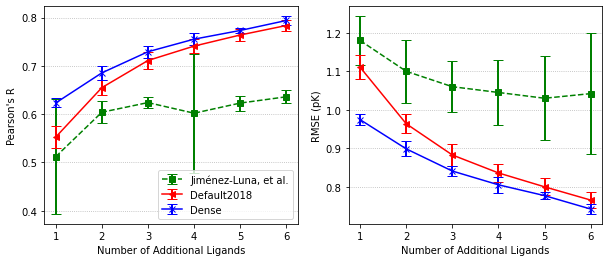

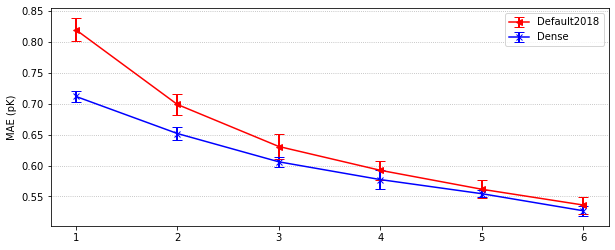

In [18]:
addnl_ligs_def2018['Addnl_Ligs'] = addnl_ligs_def2018['CSV_name'].apply(lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
addnl_ligs_dense['Addnl_Ligs'] = addnl_ligs_dense['CSV_name'].apply(lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))
fig,axes = plt.subplots(1,2,figsize=(10,4))
# fig.add_subplot(121)
plt.axes(axes[0])
plt.errorbar(their_df['Addnl Ligs'],their_df['R'],yerr=their_df['R_std'],label='Jiménez-Luna, et al.',c='g',linestyle='--',markeredgewidth=1,capsize=5,elinewidth=2,marker='s')
plt.errorbar(addnl_ligs_def2018['Addnl_Ligs'],addnl_ligs_def2018['Avg_PearsonR'],yerr=addnl_ligs_def2018['Std_PearsonR'],label='Default2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='<')
plt.errorbar(addnl_ligs_dense['Addnl_Ligs'],addnl_ligs_dense['Avg_PearsonR'],yerr=addnl_ligs_dense['Std_PearsonR'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='x')
plt.xlabel('Number of Additional Ligands')
plt.ylabel(PR_lab)
plt.legend(loc='lower right')
ax = plt.gca()
ax.grid(axis='y',linestyle=':')
# fig.add_subplot(221)
plt.axes(axes[1])
plt.errorbar(their_df['Addnl Ligs'],their_df['RMSE'],yerr=their_df['RMSE_std'],label='Jiménez-Luna, et al.',c='g',linestyle='--',markeredgewidth=1,capsize=5,elinewidth=2,marker='s')
plt.errorbar(addnl_ligs_def2018['Addnl_Ligs'],addnl_ligs_def2018['Avg_RMSE'],yerr=addnl_ligs_def2018['Std_RMSE'],label='ours',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='<')
plt.errorbar(addnl_ligs_dense['Addnl_Ligs'],addnl_ligs_dense['Avg_RMSE'],yerr=addnl_ligs_dense['Std_RMSE'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='x')
plt.xlabel('Number of Additional Ligands')
plt.ylabel(RMSE_lab)
ax = plt.gca()
ax.grid(axis='y',linestyle=':')
plt.savefig('figs/paper_comparison_main.pdf',bbox_inches="tight")
plt.figure(figsize=(10,4))
plt.errorbar(addnl_ligs_def2018['Addnl_Ligs'],addnl_ligs_def2018['Avg_MAE'],yerr=addnl_ligs_def2018['Std_MAE'],label='Default2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='<')
plt.errorbar(addnl_ligs_dense['Addnl_Ligs'],addnl_ligs_dense['Avg_MAE'],yerr=addnl_ligs_dense['Std_MAE'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='x')
plt.ylabel(MAE_lab)
plt.legend()
ax = plt.gca()
ax.grid(axis='y',linestyle=':')
plt.savefig('figs/paper_comparison_mae.pdf')

# Ablation Study

In [7]:
ablated = ['noDDG','noDG','noRot','noCons','noDDG_noCons','noDG_noCons','Concat','NoSiam','combo','ConcatCombo']
ablation_study = build_graph(['models/addnl_ligs/def2018/statistics_1.csv']+[f'models/ablation/statistics_{abl}_1.csv' for abl in ablated])

In [8]:
ablation_study

,CSV_name,Avg_PearsonR,Avg_RMSE,Avg_MAE,Avg_Abs_PearsonR,Avg_Abs_RMSE,Avg_Abs_MAE,Std_PearsonR,Std_RMSE,Std_MAE,Std_Abs_PearsonR,Std_Abs_RMSE,Std_Abs_MAE
0,models/addnl_ligs/def2018/statistics_1.csv,0.552604,1.110560,0.819712,0.864032,0.840632,0.556012,0.023302,0.030937,0.018697,0.012390,0.037750,0.030285
1,models/ablation/statistics_noDDG_1.csv,0.551424,1.122000,0.828844,0.873104,0.814296,0.517024,0.020234,0.024783,0.017870,0.005695,0.018031,0.013592
2,models/ablation/statistics_noDG_1.csv,0.459012,1.271740,0.944888,0.027832,101.398608,100.966620,0.023756,0.028858,0.018245,0.107097,34.356581,34.503455
3,models/ablation/statistics_noRot_1.csv,0.555996,1.108440,0.819052,0.866248,0.833164,0.552544,0.018768,0.023273,0.016243,0.005904,0.016947,0.014078
4,models/ablation/statistics_noCons_1.csv,0.536428,1.138604,0.841756,0.866240,0.832556,0.558808,0.020997,0.035571,0.018636,0.005588,0.017131,0.015753
5,models/ablation/statistics_noDDG_noCons_1.csv,-0.057556,1.241520,0.908476,0.872964,0.813936,0.514372,0.135973,0.014318,0.014430,0.004250,0.013229,0.012050
6,models/ablation/statistics_noDG_noCons_1.csv,0.456404,1.276752,0.949708,-0.011832,6.648104,6.442196,0.023146,0.031897,0.023326,0.049432,0.464719,0.479720
7,models/ablation/statistics_Concat_1.csv,0.554364,1.110660,0.820776,0.869868,0.824284,0.530836,0.013441,0.022326,0.017384,0.004770,0.015513,0.015841
8,models/ablation/statistics_NoSiam_1.csv,0.500384,1.150380,0.854368,0.846268,0.883052,0.615904,0.034722,0.036192,0.021031,0.017474,0.047859,0.044158
9,models/ablation/statistics_combo_1.csv,0.511876,1.174988,0.876652,0.833848,0.919172,0.665716,0.021336,0.021327,0.015102,0.011091,0.023648,0.027019


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


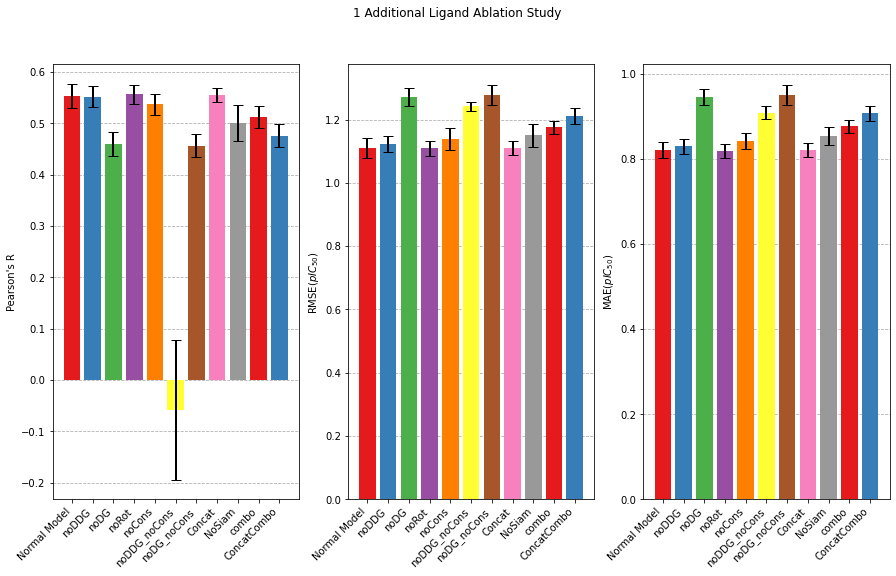

In [9]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
plt.figure(figsize=(15,8))
plt.subplot(131)
plt.bar(range(len(ablated)+1),ablation_study['Avg_PearsonR'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=ablation_study.index,yerr=ablation_study['Std_PearsonR'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
# plt.bar(1,my_df['R'][0],tick_label='Normal Model',yerr=my_df['R_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(axis='y',linestyle='--')
ax.set_xticks(list(range(len(ablated)+1)))
ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
ax.set_ylabel("Pearson's R")
plt.subplot(132)
plt.bar(range(len(ablated)+1),ablation_study['Avg_RMSE'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=ablation_study.index,yerr=ablation_study['Std_RMSE'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
# plt.bar(1,my_df['RMSE'][0],tick_label='Normal Model',yerr=my_df['RMSE_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
ax = plt.gca()
# ax.yaxis.set_label_position("right")
# ax.yaxis.tick_right()
ax.set_axisbelow(True)
ax.grid(axis='y',linestyle='--')
ax.set_xticks(list(range(len(ablated)+1)))
ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
ax.set_ylabel(r"RMSE($pIC_{50}$)")
plt.subplot(133)
plt.bar(range(len(ablated)+1),ablation_study['Avg_MAE'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=ablation_study.index,yerr=ablation_study['Std_MAE'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
# plt.bar(1,my_df['RMSE'][0],tick_label='Normal Model',yerr=my_df['RMSE_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
ax = plt.gca()
# ax.yaxis.set_label_position("right")
# ax.yaxis.tick_right()
ax.set_axisbelow(True)
ax.grid(axis='y',linestyle='--')
ax.set_xticks(list(range(len(ablated)+1)))
ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
ax.set_ylabel(r"MAE($pIC_{50}$)")
plt.suptitle('1 Additional Ligand Ablation Study')
# plt.savefig('ablation_study.pdf',dpi=300,bbox_inches='tight')
plt.show()

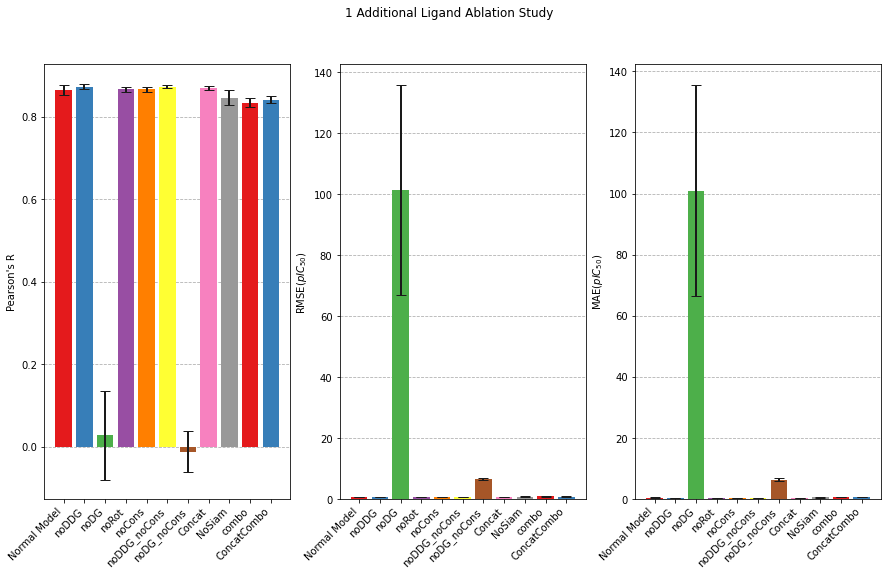

In [355]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
plt.figure(figsize=(15,8))
plt.subplot(131)
plt.bar(range(len(ablated)+1),ablation_study['Avg_Abs_PearsonR'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=ablation_study.index,yerr=ablation_study['Std_Abs_PearsonR'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
# plt.bar(1,my_df['R'][0],tick_label='Normal Model',yerr=my_df['R_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(axis='y',linestyle='--')
ax.set_xticks(list(range(len(ablated)+1)))
ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
ax.set_ylabel("Pearson's R")
plt.subplot(132)
plt.bar(range(len(ablated)+1),ablation_study['Avg_Abs_RMSE'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=ablation_study.index,yerr=ablation_study['Std_Abs_RMSE'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
# plt.bar(1,my_df['RMSE'][0],tick_label='Normal Model',yerr=my_df['RMSE_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
ax = plt.gca()
# ax.yaxis.set_label_position("right")
# ax.yaxis.tick_right()
ax.set_axisbelow(True)
ax.grid(axis='y',linestyle='--')
ax.set_xticks(list(range(len(ablated)+1)))
ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
ax.set_ylabel(r"RMSE($pIC_{50}$)")
plt.subplot(133)
plt.bar(range(len(ablated)+1),ablation_study['Avg_Abs_MAE'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=ablation_study.index,yerr=ablation_study['Std_Abs_MAE'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
# plt.bar(1,my_df['RMSE'][0],tick_label='Normal Model',yerr=my_df['RMSE_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
ax = plt.gca()
# ax.yaxis.set_label_position("right")
# ax.yaxis.tick_right()
ax.set_axisbelow(True)
ax.grid(axis='y',linestyle='--')
ax.set_xticks(list(range(len(ablated)+1)))
ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
ax.set_ylabel(r"MAE($pIC_{50}$)")
plt.suptitle('1 Additional Ligand Ablation Study')
plt.show()

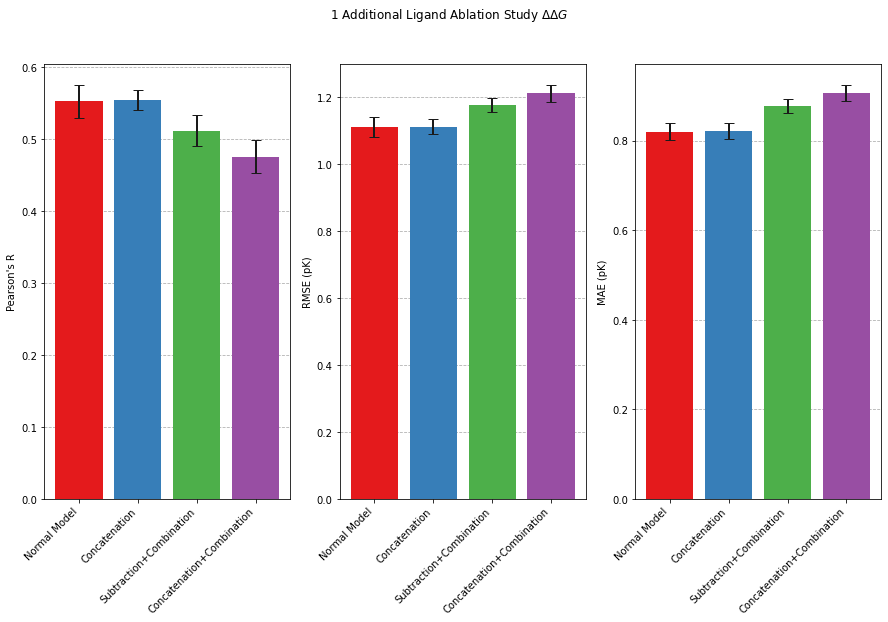

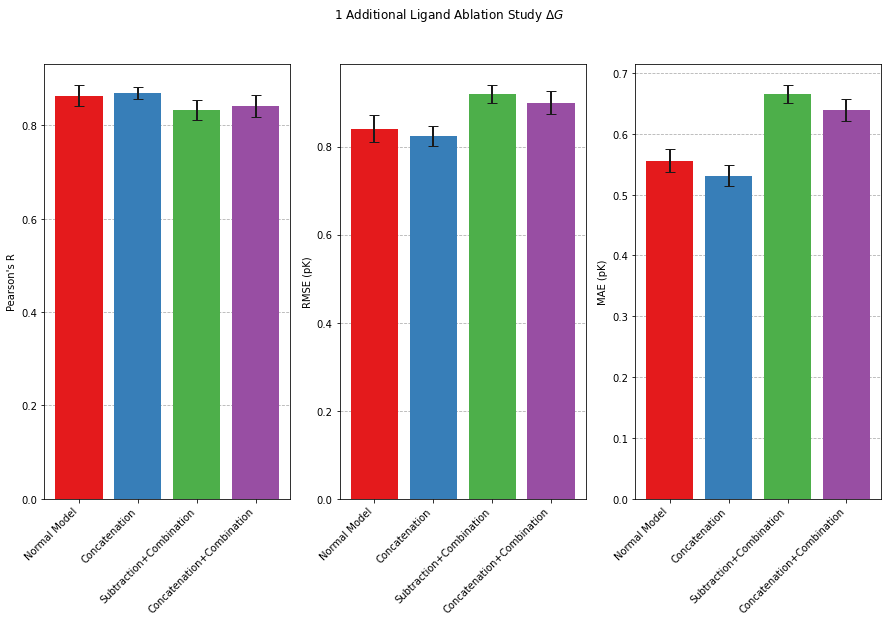

In [356]:
small_ablation_study = ablation_study[ablation_study['CSV_name'].isin(['models/addnl_ligs/def2018/statistics_1.csv',
                                                                 'models/ablation/statistics_Concat_1.csv',
                                                                 'models/ablation/statistics_combo_1.csv',
                                                                'models/ablation/statistics_ConcatCombo_1.csv'])]
ablated = ['Concatenation','Subtraction+Combination','Concatenation+Combination']
for figs in ['','_Abs']:
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set1.colors)
    plt.figure(figsize=(15,8))
    plt.subplot(131)
    plt.bar(range(len(ablated)+1),small_ablation_study[f'Avg{figs}_PearsonR'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=small_ablation_study.index,yerr=small_ablation_study['Std_PearsonR'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
    # plt.bar(1,my_df['R'][0],tick_label='Normal Model',yerr=my_df['R_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
    ax = plt.gca()
    ax.set_axisbelow(True)
    ax.grid(axis='y',linestyle='--')
    ax.set_xticks(list(range(len(ablated)+1)))
    ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
    ax.set_ylabel(PR_lab)
    plt.subplot(132)
    plt.bar(range(len(ablated)+1),small_ablation_study[f'Avg{figs}_RMSE'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=small_ablation_study.index,yerr=small_ablation_study['Std_RMSE'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
    # plt.bar(1,my_df['RMSE'][0],tick_label='Normal Model',yerr=my_df['RMSE_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
    ax = plt.gca()
    # ax.yaxis.set_label_position("right")
    # ax.yaxis.tick_right()
    ax.set_axisbelow(True)
    ax.grid(axis='y',linestyle='--')
    ax.set_xticks(list(range(len(ablated)+1)))
    ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
    ax.set_ylabel(RMSE_lab)
    plt.subplot(133)
    plt.bar(range(len(ablated)+1),small_ablation_study[f'Avg{figs}_MAE'],color=plt.cm.Set1.colors[:len(ablated)+1],tick_label=small_ablation_study.index,yerr=small_ablation_study['Std_MAE'],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
    # plt.bar(1,my_df['RMSE'][0],tick_label='Normal Model',yerr=my_df['RMSE_std'][0],capsize=5,error_kw={"markeredgewidth":1,"elinewidth":2})
    ax = plt.gca()
    # ax.yaxis.set_label_position("right")
    # ax.yaxis.tick_right()
    ax.set_axisbelow(True)
    ax.grid(axis='y',linestyle='--')
    ax.set_xticks(list(range(len(ablated)+1)))
    ax.set_xticklabels(['Normal Model']+ablated,rotation=45,ha='right')
    ax.set_ylabel(MAE_lab)
    if figs == '_Abs':
        plt.suptitle('1 Additional Ligand Ablation Study $\Delta G$')
        plt.savefig('figs/combo_study_dg.pdf',dpi=300,bbox_inches='tight')
    else:
        plt.suptitle('1 Additional Ligand Ablation Study $\Delta\Delta G$')
        plt.savefig('figs/combo_study_ddg.pdf',dpi=300,bbox_inches='tight')
    # plt.savefig('ablation_study.pdf',dpi=300,bbox_inches='tight')
    plt.show()

In [25]:
ablation_table = ablation_study.copy()
for metric in base_statistics:
    ablation_table[f"{metric}"] = ablation_table[[f"Avg_{metric}",f"Std_{metric}"]].apply(lambda x: r"${:.3g}(\pm {:.3g})$".format(x[0],x[1]),axis=1)
ablation_table.drop([col for col in ablation_table.columns if ('Avg' in col) or ('Std' in col)],axis=1, inplace=True)
ablated = ['noDDG','noDG','noRot','noCons','noDDG_noCons','noDG_noCons','Concat','NoSiam','combo','ConcatCombo']
ablation_table['CSV_name'] = ["Standard","No $L_{\Delta\Delta G}$",
                              "No $L_{\Delta G}$","No $L_{\mathrm{rotation}}$",
                              "No $L_{\mathrm{consistency}}$","No $L_{\Delta\Delta G}$, $L_{\mathrm{consistency}}$",
                              "No $L_{\Delta G}$, $L_{\mathrm{consistency}}$",
                              "Concatenation","No Siamese Network","Subtraction, Single-order","Concatentation, Single-order"]
# LDataFrame(ablation_table).to_latex("ablation_table.tex",
#                         header=['Ablation',"Pearson's R","RMSE","MAE","Pearson's R","RMSE", "MAE"],
#                         toprow=[(1,''),(3,'Relative Binding Free Energy'),(3,'Absolute Binding Free Energy')]
#                        )
ablation_table[['CSV_name',"PearsonR","RMSE","MAE"]].to_latex("figs/ablation_table_NIPS.tex",
                       header=['Ablation',PR_lab,RMSE_lab,MAE_lab],
                        escape=False, index=False
                       )
ablation_table[['CSV_name',"Abs_PearsonR","Abs_RMSE","Abs_MAE"]].to_latex("figs/ablation_table_supp_NIPS.tex",
                       header=['Ablation',PR_lab,RMSE_lab,MAE_lab],
                        escape=False, index=False
                       )

In [26]:
significant = 0.05/10 #using bonferroni correction
from scipy.stats import ttest_ind_from_stats
with open('figs/ablation_table_stats.tex','w') as ablate:
    ablate.write('\\begin{tabular}{l l l l} \n')
    ablate.write(f"\\toprule \n Ablation & {PR_lab} & {RMSE_lab} & {MAE_lab} \\\\ \\midrule \n")
    # ablate.write(f'Standard & {ablation_table.iloc[0]["PearsonR"]} & {ablation_table.iloc[0]["RMSE"]} & {ablation_table.iloc[0]["MAE"]} \\\\ \n')
    for idx in range(0,len(ablation_study)):
        if idx > 0:
            _, pvals = ttest_ind_from_stats(np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Avg' in name and 'Abs' not in name]),
                    np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Std' in name and 'Abs' not in name]),
                    np.array([25 for val in range(3)]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Avg' in name and 'Abs' not in name]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Std' in name and 'Abs' not in name]),
                    np.array([25 for _ in range(3)]), equal_var=False)
        else:
            pvals = [ 1.0 for _ in range(4)]
        ablate.write(f'{ablation_table.iloc[idx]["CSV_name"]} ')
        for pv, stat in zip(pvals,["PearsonR","RMSE","MAE"]):
            insert1,insert2  = '$','$'
            if pv > significant:
                insert1, insert2 = '$\\mathbf{','}$'
            stat_string = '{:.3g} (\pm {:.3g})'.format(ablation_study.iloc[idx][f"Avg_{stat}"],ablation_study.iloc[idx][f"Std_{stat}"])
            ablate.write(f"& {insert1}{stat_string}{insert2} ")
        ablate.write('\\\\ \n')
    ablate.write("\\bottomrule \n \\end{tabular}")


In [27]:
significant = 0.05/10 #using bonferroni correction
from scipy.stats import ttest_ind_from_stats
with open('figs/ablation_table_supp_stats.tex','w') as ablate:
    ablate.write('\\begin{tabular}{l l l l} \n')
    ablate.write(f"\\toprule \n Ablation & {PR_lab} & {RMSE_lab} & {MAE_lab} \\\\ \\midrule \n")
    # ablate.write(f'Standard & {ablation_table.iloc[0]["Abs_PearsonR"]} & {ablation_table.iloc[0]["Abs_RMSE"]} & {ablation_table.iloc[0]["Abs_MAE"]} \\\\ \n')
    for idx in range(0,len(ablation_study)):
        if idx > 0:
            _, pvals = ttest_ind_from_stats(np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Avg' in name and 'Abs' in name]),
                    np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Std' in name and 'Abs' in name]),
                    np.array([25 for val in range(3)]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Avg' in name and 'Abs' in name]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Std' in name and 'Abs' in name]),
                    np.array([25 for _ in range(3)]), equal_var=False)
        else:
            pvals = [ 1.0 for _ in range(4)]
        ablate.write(f'{ablation_table.iloc[idx]["CSV_name"]} ')
        for pv, stat in zip(pvals,["Abs_PearsonR","Abs_RMSE","Abs_MAE"]):
            insert1, insert2  = '$', '$'
            if pv > significant:
                insert1, insert2 = '$\\mathbf{','}$'
            stat_string = '{:.3g} (\pm {:.3g})'.format(ablation_study.iloc[idx][f"Avg_{stat}"],ablation_study.iloc[idx][f"Std_{stat}"])
            ablate.write(f"& {insert1}{stat_string}{insert2} ")
        ablate.write('\\\\ \n')
    ablate.write("\\bottomrule \n \\end{tabular}")


In [28]:
# NeurIPS table (no combinations)
significant = 0.05/8 #using bonferroni correction
from scipy.stats import ttest_ind_from_stats
with open('figs/ablation_table_NIPS.tex','w') as ablate:
    ablate.write('\\begin{tabular}{l l l l} \n')
    ablate.write(f"\\toprule \n Ablation & {PR_lab} & {RMSE_lab} & {MAE_lab} \\\\ \\midrule \n")
    insert1,insert2='$\\mathbf{','}$'
    # ablate.write(f'Standard & {insert1}{ablation_table.iloc[0]["PearsonR"]}{insert2} & {insert1}{ablation_table.iloc[0]["RMSE"]}{insert2} & {insert1}{ablation_table.iloc[0]["MAE"]}{insert2} \\\\ \n')
    for idx in range(0,len(ablation_study)):
        if 'Single-order' in ablation_table.iloc[idx]["CSV_name"]:
            continue
        if idx > 0:
            _, pvals = ttest_ind_from_stats(np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Avg' in name and 'Abs' not in name]),
                    np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Std' in name and 'Abs' not in name]),
                    np.array([25 for val in range(3)]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Avg' in name and 'Abs' not in name]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Std' in name and 'Abs' not in name]),
                    np.array([25 for _ in range(3)]), equal_var=False)
        else:
            pvals = [1.0 for _ in range(4)]
        ablate.write(f'{ablation_table.iloc[idx]["CSV_name"]} ')
        for pv, stat in zip(pvals,["PearsonR","RMSE","MAE"]):
            insert1,insert2  = '$','$'
            if pv > significant:
                insert1, insert2 = '$\\mathbf{','}$'
            stat_string = '{:.3g} (\pm {:.3g})'.format(ablation_study.iloc[idx][f"Avg_{stat}"],ablation_study.iloc[idx][f"Std_{stat}"])
            ablate.write(f"& {insert1}{stat_string}{insert2} ")
        ablate.write('\\\\ \n')
    ablate.write("\\bottomrule \n \\end{tabular}")


In [29]:
significant = 0.05/8 #using bonferroni correction
from scipy.stats import ttest_ind_from_stats
with open('figs/ablation_table_supp_NIPS.tex','w') as ablate:
    ablate.write('\\begin{tabular}{l l l l} \n')
    ablate.write(f"\\toprule \n Ablation & {PR_lab} & {RMSE_lab} & {MAE_lab} \\\\ \\midrule \n")
    insert1,insert2='$\\mathbf{','}$'
    # ablate.write(f'Standard & {insert1}{ablation_table.iloc[0]["Abs_PearsonR"]}{insert2} & {insert1}{ablation_table.iloc[0]["Abs_RMSE"]}{insert2} & {insert1}{ablation_table.iloc[0]["Abs_MAE"]}{insert2} \\\\ \n')
    for idx in range(0,len(ablation_study)):
        if 'Single-order' in ablation_table.iloc[idx]["CSV_name"]:
            continue
        if idx > 0:
            _, pvals = ttest_ind_from_stats(np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Avg' in name and 'Abs' in name]),
                    np.array([ val for name, val in ablation_study.iloc[0].iteritems() if 'Std' in name and 'Abs' in name]),
                    np.array([25 for val in range(3)]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Avg' in name and 'Abs' in name]),
                    np.array([ val for name, val in ablation_study.iloc[idx].iteritems() if 'Std' in name and 'Abs' in name]),
                    np.array([25 for _ in range(3)]), equal_var=False)
        else:
            pvals = [ 1.0 for val in range(4)]
        ablate.write(f'{ablation_table.iloc[idx]["CSV_name"]} ')
        for pv, stat in zip(pvals,["Abs_PearsonR","Abs_RMSE","Abs_MAE"]):
            insert1, insert2  = '$', '$'
            if pv > significant:
                insert1, insert2 = '$\\mathbf{','}$'
            stat_string = '{:.3g} (\pm {:.3g})'.format(ablation_study.iloc[idx][f"Avg_{stat}"],ablation_study.iloc[idx][f"Std_{stat}"])
            ablate.write(f"& {insert1}{stat_string}{insert2} ")
        ablate.write('\\\\ \n')
    ablate.write("\\bottomrule \n \\end{tabular}")


## Evaluate difference in performance when permutation vs combination train

In [360]:
from python_files.multtask_latent_def2018_concat_model import Net as ConcatNet
from python_files.multtask_latent_def2018_model import Net as SubtractNet
def evaluate_reverse(model_files,stats_save_name):
    stats_list=[]
    for model_file in model_files:
        print(model_file)
        if 'Concat' in model_file:
            Net = ConcatNet
        else:
            Net = SubtractNet
        
        test_data = molgrid.ExampleProvider(ligmolcache=f"cache/lig_full_bdb.molcache2",
                                        recmolcache=f"cache/rec_full_bdb.molcache2", 
                                    shuffle=True, duplicate_first=True, default_batch_size=16,
                                    iteration_scheme=molgrid.IterationScheme.LargeEpoch)
        testfile_num = model_file.split('.')[0].split('_')[-1]
        test_data.populate(f"new_Prot_Lig_Valid/all_data_test_papersplit_rand{testfile_num}_c_1.types")

        gmaker = molgrid.GridMaker()      
        dims = gmaker.grid_dimensions(14*4)  # only one rec+onelig per example      
        tensor_shape = (16,)+dims      

        args = Namespace(dropout=0,hidden_size=0)
        actual_dims = (dims[0]//2, *dims[1:])      
        model = Net(actual_dims,args).to('cuda')

        pretrained_state_dict = torch.load(model_file)      
        model_dict = model.state_dict()      
        pretrained_dict = {k: v for k, v in pretrained_state_dict.items() if k in model_dict}      
        model_dict.update(pretrained_dict)      
        model.load_state_dict(model_dict)
        
        input_tensor_1 = torch.zeros(tensor_shape, dtype=torch.float32, device='cuda')
        float_labels = torch.zeros(16, dtype=torch.float32)
        lig1_label = torch.zeros(16, dtype=torch.float32)
        lig2_label = torch.zeros(16, dtype=torch.float32)

        #running test loop
        model.eval()

        output_dist, output_dist_reverse, actual, actual_reverse = [], [], [], []
        lig_pred, lig_labels = [], []
        with torch.no_grad():
            for idx, batch in enumerate(test_data):        
                gmaker.forward(batch, input_tensor_1, random_translation=2.0, random_rotation=True) 
                batch.extract_label(1, float_labels)
                labels = torch.unsqueeze(float_labels, 1).float().to('cuda')
                batch.extract_label(2, lig1_label)
                batch.extract_label(3, lig2_label)
                lig1_labels = torch.unsqueeze(lig1_label, 1).float().to('cuda')
                lig2_labels = torch.unsqueeze(lig2_label, 1).float().to('cuda')
                output, lig1, lig2, _, _ = model(input_tensor_1[:, :28, :, :, :], input_tensor_1[:, 28:, :, :, :])
                output_reverse, lig1, lig2, _, _ = model(input_tensor_1[:, 28:, :, :, :], input_tensor_1[:, :28, :, :, :])
                lig_pred += lig1.flatten().tolist() + lig2.flatten().tolist()
                lig_labels += lig1_labels.flatten().tolist() + lig2_labels.flatten().tolist()
                output_dist += output.flatten().tolist()
                actual += labels.flatten().tolist()
                output_dist_reverse += output_reverse.flatten().tolist()
                actual_reverse += (-labels).flatten().tolist()
            
        r, rmse, mae = get_stats(0,output_dist,actual,lig_pred,lig_labels)
        r_full, rmse_full, mae_full = get_stats(0,output_dist+output_dist_reverse,actual+actual_reverse,lig_pred,lig_labels)
        
        stats_list.append([testfile_num,r[0],r_full[0],rmse[0],rmse_full[0], mae[0],mae_full[0],(np.array(output_dist)+np.array(output_dist_reverse)).mean()])
        
    final_stats = pd.DataFrame(stats_list,columns=['randval','PearsonR','R_Full','RMSE', 'RMSE_Full','MAE','MAE_Full','Avg Diff'])
    final_stats.to_csv(f"{stats_save_name}",index=False,float_format="%.4f")
    return final_stats

In [361]:
# final_stats = evaluate_reverse(glob('models/addnl_ligs/def2018/model_1_*.h5'),'models/ablation/everything_eval_perms.csv')
# final_stats_concat = evaluate_reverse(glob('models/ablation/model_Concat_1_*.h5'),'models/ablation/concat_eval_perms.csv')
# final_stats_combo = evaluate_reverse(glob('models/ablation/model_combo_1_*.h5'),'models/ablation/everything_combo_eval_perms.csv')
# final_stats_concatcombo = evaluate_reverse(glob('models/ablation/model_ConcatCombo_1_*.h5'),'models/ablation/concat_combo_eval_perms.csv')

In [98]:
final_stats = pd.read_csv('models/ablation/everything_eval_perms.csv')
final_stats_concat = pd.read_csv('models/ablation/concat_eval_perms.csv')
final_stats_combo = pd.read_csv('models/ablation/everything_combo_eval_perms.csv')
final_stats_concatcombo = pd.read_csv('models/ablation/concat_combo_eval_perms.csv')

In [99]:
with open("figs/permute_vs_combo.tex","w") as pvc:
    pvc.write('\\begin{tabular}{l l} \n')
    pvc.write("\\toprule \n Ablation & Average Sum of Ligand Orderings ($\mathrm{pK}$) \\\\ \\midrule \n")
    for evaluation,model_name in zip([final_stats,final_stats_combo,final_stats_concat,final_stats_concatcombo],['Normal Model','Subtraction, Single-order','Concatenation','Concatenation, Single-order']):
        pvc.write(f"\t {model_name} & {evaluation['Avg Diff'].mean():.4f} (\pm {evaluation['Avg Diff'].std():.4f}) \\\\ \n")
    pvc.write("\\bottomrule \n \\end{tabular}")
# print('{:.4f} & {:.4f} & {:.4f} & {:.4f} \\\\'.format(final_stats['Avg Diff'].mean(),final_stats_concat['Avg Diff'].mean(),final_stats_combo['Avg Diff'].mean(),final_stats_concatcombo['Avg Diff'].mean()))
# print('{:.4f} & {:.4f} & {:.4f} & {:.4f} \\\\'.format(final_stats['Avg Diff'].std(),final_stats_concat['Avg Diff'].std(),final_stats_combo['Avg Diff'].std(),final_stats_concatcombo['Avg Diff'].std()))

# Evaluating LOO-PFAM

## First pure No-shot

In [376]:
model="multtask_latent_def2018"
weight_decay=0
ddg_weight=10
consistency_weight=1
absolute_weight=1
rotation_weight=1
use_weights=None
model_save_path = 'models/LOO-PFAM/def2018/'
spec_name=''
loopfam_runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
                       filters={"$and":[{"config.use_model":model},{'tags':f'BASE_PFAM'},
                                        {"config.rot_warmup":0},{"config.weight_decay":weight_decay},
                                        {"config.solver":"adam"},{"config.ddg_loss_weight":ddg_weight},
                                        {"config.consistency_loss_weight":consistency_weight},
                                        {"config.absolute_loss_weight":absolute_weight},
                                        {"config.rotation_loss_weight":rotation_weight},
                                        {"config.use_weights":use_weights},
                                        {"state":"finished"}]})
print(len(loopfam_runs))

72


In [27]:
def create_stats_loo_pfam(model_save_path,runs):
    if not os.path.exists(model_save_path):
        os.makedirs(model_save_path)
    rands = []
    stats_list = []
    predictions = []
    actual = []
    for run in runs:
        saved_tag = ''
        if run.state != 'finished':
            continue
        testfile = run.config['testfile'].split('/')[-1].split('.')[0]
        saved_tag = list(map(int,re.findall(r'\d+',testfile)))[0]
        print(saved_tag)
        
        if saved_tag > 71:
            continue
        # assert saved_tag < len(runs), f"{run.tags}_{run}"
        if not os.path.isfile(f"{model_save_path}model_{saved_tag}.h5"):
            run.file('model.h5').download(root=model_save_path)
            os.rename(f"{model_save_path}model.h5",f"{model_save_path}model_{saved_tag}.h5")

        config = Namespace()
        for k,v in run.config.items():
            setattr(config,k,v)

        r,rmse, mae, vals = get_eval(config,f"{model_save_path}model_{saved_tag}.h5",return_vals=True)
        # print(saved_tag,r,rmse,mae)
        stats_list.append([saved_tag,len(vals[0]),r[0],rmse[0],mae[0],r[1],rmse[1],mae[1]])
        predictions += vals[0]
        actual += vals[1]
        
        
    final_stats = pd.DataFrame(stats_list,columns=['PFAM','Test Size','PearsonR','RMSE','MAE','Abs_PearsonR','Abs_RMSE','Abs_MAE'])
    final_stats.to_csv(f"{model_save_path}statistics.csv",index=False,float_format="%.4f")
    
    return final_stats, (predictions, actual)

In [28]:
loo_pfam_stats, LOO_PFAM_pred_act = create_stats_loo_pfam('models/LOO-PFAM/def2018/',loopfam_runs)

NameError: name 'loopfam_runs' is not defined

In [30]:
loo_pfam_stats = pd.read_csv('models/LOO-PFAM/def2018/statistics.csv')

In [31]:
pfam_mapping = pd.read_table('new_Prot_Lig_Valid/pfam_values_map.txt',sep=' ').to_dict('index')
loo_pfam_stats['pfam'] = loo_pfam_stats['PFAM'].apply(lambda x: pfam_mapping[x]['Test_PFAM'])

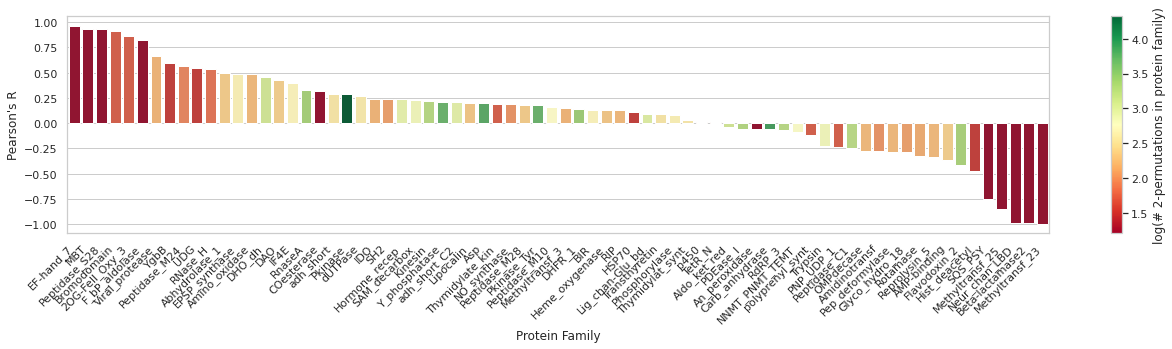

In [380]:
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
sorted_loopfam = loo_pfam_stats.sort_values(['PearsonR'],ascending=False)
sns.set(rc={"figure.figsize":(22, 4)})
sns.set_theme(style="whitegrid")
norm = plt.Normalize(vmin=np.log10(sorted_loopfam['Test Size'].min()), vmax=np.log10(sorted_loopfam['Test Size'].max()))
colors = [plt.cm.RdYlGn(norm(np.log10(c))) for c in sorted_loopfam['Test Size']]
chart = sns.barplot(x='pfam',y='PearsonR',data=sorted_loopfam,palette=colors)
_ = chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel("Pearson's R")
chart.set_xlabel("Protein Family")

# norm = plt.Normalize(sorted_loopfam['Test Size'].min(), sorted_loopfam['Test Size'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# chart.get_legend().remove()
chart.figure.colorbar(sm,label="log(# 2-permutations in protein family)")
plt.savefig('figs/LOO_pfam_R_NeurIPS.pdf',bbox_inches="tight")

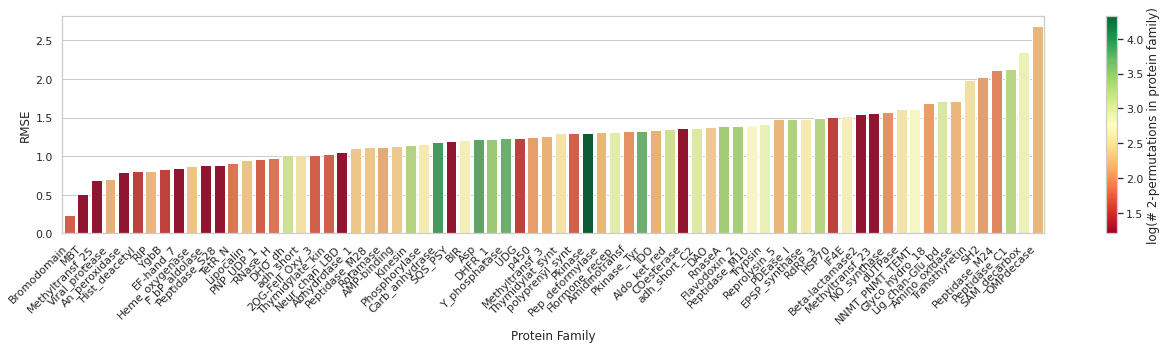

In [381]:
sorted_loopfam = loo_pfam_stats.sort_values(['RMSE'])
sns.set(rc={"figure.figsize":(22, 4)})
sns.set_theme(style="whitegrid")
norm = plt.Normalize(vmin=np.log10(sorted_loopfam['Test Size'].min()), vmax=np.log10(sorted_loopfam['Test Size'].max()))
colors = [plt.cm.RdYlGn(norm(np.log10(c))) for c in sorted_loopfam['Test Size']]
chart = sns.barplot(x='pfam',y='RMSE',data=sorted_loopfam,palette=colors)
_ = chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel("RMSE")
chart.set_xlabel("Protein Family")

# norm = plt.Normalize(sorted_loopfam['Test Size'].min(), sorted_loopfam['Test Size'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# chart.get_legend().remove()
chart.figure.colorbar(sm,label="log(# 2-permutations in protein family)")
plt.savefig('figs/LOO_pfam_RMSE_NeurIPS.pdf',bbox_inches="tight")

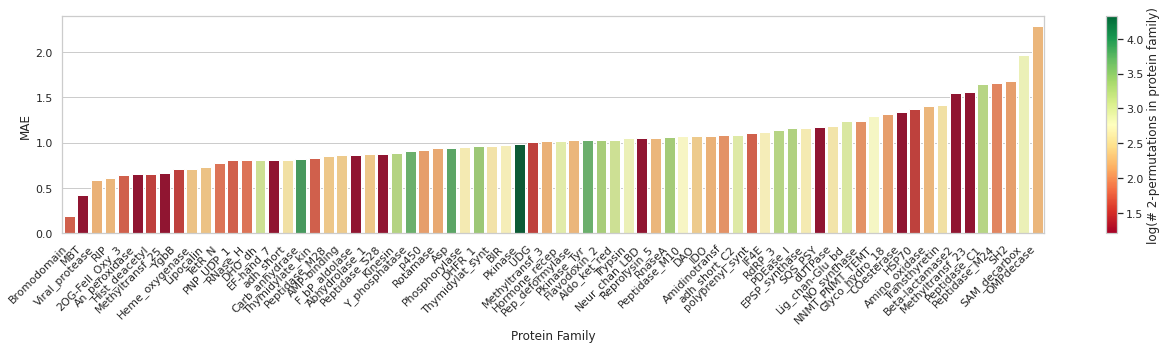

In [382]:
sorted_loopfam = loo_pfam_stats.sort_values(['MAE'])
sns.set(rc={"figure.figsize":(22, 4)})
sns.set_theme(style="whitegrid")
norm = plt.Normalize(vmin=np.log10(sorted_loopfam['Test Size'].min()), vmax=np.log10(sorted_loopfam['Test Size'].max()))
colors = [plt.cm.RdYlGn(norm(np.log10(c))) for c in sorted_loopfam['Test Size']]
chart = sns.barplot(x='pfam',y='MAE',data=sorted_loopfam,palette=colors)
_ = chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel("MAE")
chart.set_xlabel("Protein Family")

# norm = plt.Normalize(sorted_loopfam['Test Size'].min(), sorted_loopfam['Test Size'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# chart.get_legend().remove()
chart.figure.colorbar(sm,label="log(# 2-permutations in protein family)")
plt.savefig('figs/LOO_pfam_MAE_NeurIPS.pdf',bbox_inches="tight")

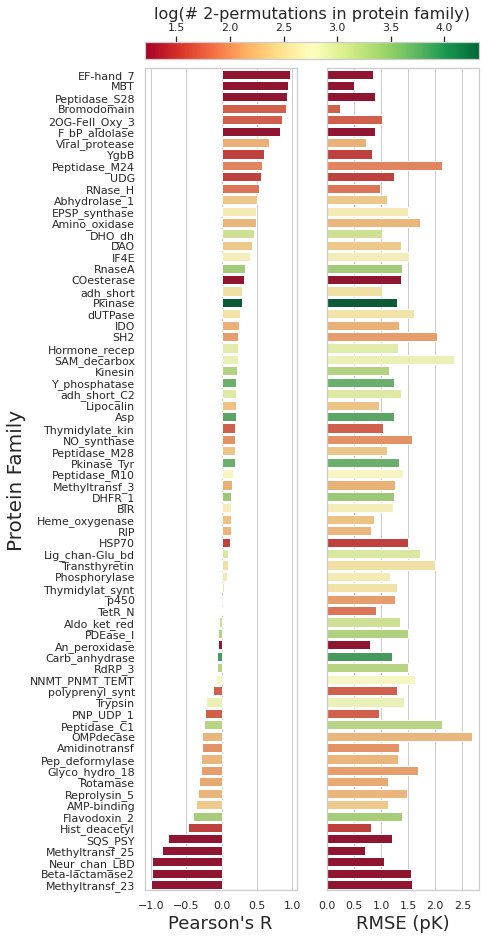

In [58]:
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
f, axs = plt.subplots(1,2,sharey=True,figsize=(6,18))
sorted_loopfam = loo_pfam_stats.sort_values(['PearsonR'],ascending=False)
# sns.set(rc={"figure.figsize":(10, 20)})
sns.set_theme(style="whitegrid")
norm = plt.Normalize(vmin=np.log10(sorted_loopfam['Test Size'].min()), vmax=np.log10(sorted_loopfam['Test Size'].max()))
colors = [plt.cm.RdYlGn(norm(np.log10(c))) for c in sorted_loopfam['Test Size']]
chart = sns.barplot(y='pfam',x='PearsonR',data=sorted_loopfam,palette=colors, ax=axs[0])
_ = chart.set_yticklabels(labels=chart.get_yticklabels())
chart.set_xlabel("Pearson's R",fontsize=18)
chart.set_ylabel("Protein Family",fontsize=20)
chart.set_xticks([-1,-0.5,0,0.5,1])
chart2 = sns.barplot(y='pfam',x='RMSE',data=sorted_loopfam,palette=colors, ax=axs[1])
chart2.set_xlabel("RMSE (pK)",fontsize=18)
chart2.set_ylabel('')
chart2.set_xticks([0,0.5,1,1.5,2,2.5])

# norm = plt.Normalize(sorted_loopfam['Test Size'].min(), sorted_loopfam['Test Size'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# chart.get_legend().remove()
cb = f.colorbar(sm,orientation='horizontal',location='top',ax=axs[:],pad=0.01)
cb.set_label(label="log(# 2-permutations in protein family)",fontsize=16)
plt.savefig('figs/LOO_pfam_NeurIPS_poster.png',dpi=300,bbox_inches="tight")

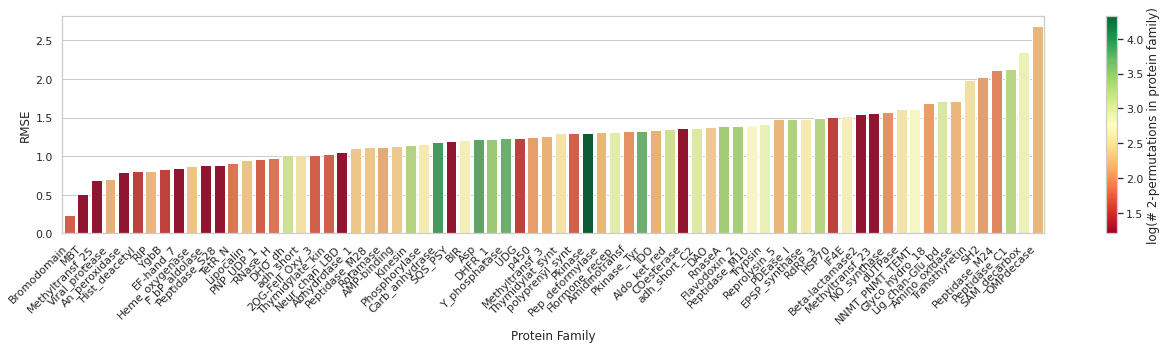

In [381]:
sorted_loopfam = loo_pfam_stats.sort_values(['RMSE'])
sns.set(rc={"figure.figsize":(22, 4)})
sns.set_theme(style="whitegrid")
norm = plt.Normalize(vmin=np.log10(sorted_loopfam['Test Size'].min()), vmax=np.log10(sorted_loopfam['Test Size'].max()))
colors = [plt.cm.RdYlGn(norm(np.log10(c))) for c in sorted_loopfam['Test Size']]
chart = sns.barplot(x='pfam',y='RMSE',data=sorted_loopfam,palette=colors)
_ = chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel("RMSE")
chart.set_xlabel("Protein Family")

# norm = plt.Normalize(sorted_loopfam['Test Size'].min(), sorted_loopfam['Test Size'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# chart.get_legend().remove()
chart.figure.colorbar(sm,label="log(# 2-permutations in protein family)")
plt.savefig('figs/LOO_pfam_RMSE_NeurIPS.pdf',bbox_inches="tight")

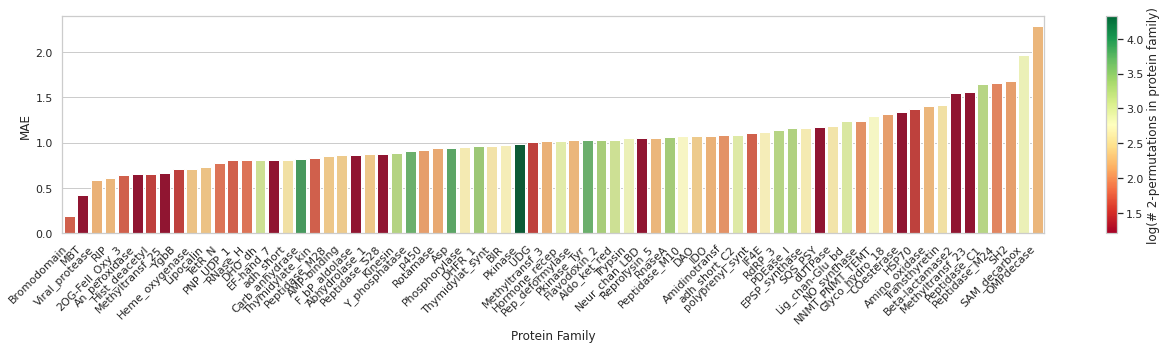

In [382]:
sorted_loopfam = loo_pfam_stats.sort_values(['MAE'])
sns.set(rc={"figure.figsize":(22, 4)})
sns.set_theme(style="whitegrid")
norm = plt.Normalize(vmin=np.log10(sorted_loopfam['Test Size'].min()), vmax=np.log10(sorted_loopfam['Test Size'].max()))
colors = [plt.cm.RdYlGn(norm(np.log10(c))) for c in sorted_loopfam['Test Size']]
chart = sns.barplot(x='pfam',y='MAE',data=sorted_loopfam,palette=colors)
_ = chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel("MAE")
chart.set_xlabel("Protein Family")

# norm = plt.Normalize(sorted_loopfam['Test Size'].min(), sorted_loopfam['Test Size'].max())
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
sm.set_array([])

# chart.get_legend().remove()
chart.figure.colorbar(sm,label="log(# 2-permutations in protein family)")
plt.savefig('figs/LOO_pfam_MAE_NeurIPS.pdf',bbox_inches="tight")

In [383]:
print(get_stats(0,LOO_PFAM_pred_act[0],LOO_PFAM_pred_act[1],[],[]))
print("mean:",loo_pfam_stats.mean())
print("min:",loo_pfam_stats.min())
print("max:",loo_pfam_stats.max())

0:x and y must have length at least 2.
((0.15860369421442302, nan), (1.3473045413538147, nan), (1.0086154799938176, nan))
mean: PFAM              35.500000
Test Size       1054.888889
PearsonR           0.107928
RMSE               1.283582
MAE                1.034577
Abs_PearsonR       0.082482
Abs_RMSE           1.688834
Abs_MAE            1.466663
dtype: float64
min: PFAM                         0
Test Size                   16
PearsonR             -0.994489
RMSE                   0.23792
MAE                   0.195843
Abs_PearsonR         -0.970546
Abs_RMSE              0.486228
Abs_MAE               0.391471
pfam            2OG-FeII_Oxy_3
dtype: object
max: PFAM                         71
Test Size                 21216
PearsonR               0.964145
RMSE                   2.679746
MAE                    2.277762
Abs_PearsonR           0.881006
Abs_RMSE               4.467113
Abs_MAE                4.406024
pfam            polyprenyl_synt
dtype: object


<ipython-input-218-e7206f513fb7>:15: RuntimeWarning: Mean of empty slice.
  rmse_abs = np.sqrt(((np.array(pred_abs)-np.array(actual_abs)) ** 2).mean())
/home/anm329/anaconda3/envs/py38_torch/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-218-e7206f513fb7>:19: RuntimeWarning: Mean of empty slice.
  np.abs(np.array(pred_abs)-np.array(actual_abs)).mean())


# No shot and Few-Shot

In [316]:
# model="multtask_latent_def2018"
# weight_decay=0
# ddg_weight=10
# consistency_weight=1
# absolute_weight=1
# rotation_weight=1
# use_weights=None
# stratify_rec = False
# ns_runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
#                        filters={"$and":[{"config.use_model":model},{'tags':f'CV_add_0'},{'tags':f'fixed'},
#                                         {"config.rot_warmup":0},{"config.weight_decay":weight_decay},
#                                         {"config.solver":"adam"},{"config.ddg_loss_weight":ddg_weight},
#                                         {"config.consistency_loss_weight":consistency_weight},
#                                         {"config.stratify_rec":stratify_rec},
#                                         {"config.absolute_loss_weight":absolute_weight},
#                                         {"config.rotation_loss_weight":rotation_weight},
#                                         {"config.use_weights":use_weights},
#                                         {"state":"finished"}]})
# print(f"no_shot {len(ns_runs)}")
# ns_stats, ns_pred_act = create_stats_loo_pfam('models/LOO-PFAM_fewshot/noshot/',ns_runs)
# fs2_runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
#                        filters={"$and":[{"config.use_model":model},{'tags':f'CV_add_2'},{'tags':f'fixed'},
#                                         {"config.rot_warmup":0},{"config.weight_decay":weight_decay},
#                                         {"config.solver":"adam"},{"config.ddg_loss_weight":ddg_weight},
#                                         {"config.consistency_loss_weight":consistency_weight},
#                                         {"config.stratify_rec":stratify_rec},
#                                         {"config.absolute_loss_weight":absolute_weight},
#                                         {"config.rotation_loss_weight":rotation_weight},
#                                         {"config.use_weights":use_weights},
#                                         {"state":"finished"}]})
# print(f"fs2 {len(fs2_runs)}")
# fs2_stats, fs2_pred_act = create_stats_loo_pfam('models/LOO-PFAM_fewshot/fs2/',fs2_runs)
# fs4_runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
#                        filters={"$and":[{"config.use_model":model},{'tags':f'CV_add_4'},{'tags':f'fixed'},
#                                         {"config.rot_warmup":0},{"config.weight_decay":weight_decay},
#                                         {"config.solver":"adam"},{"config.ddg_loss_weight":ddg_weight},
#                                         {"config.consistency_loss_weight":consistency_weight},
#                                         {"config.stratify_rec":stratify_rec},
#                                         {"config.absolute_loss_weight":absolute_weight},
#                                         {"config.rotation_loss_weight":rotation_weight},
#                                         {"config.use_weights":use_weights},
#                                         {"state":"finished"}]})
# print(f"fs4 {len(fs4_runs)}")
# fs4_stats, fs4_pred_act = create_stats_loo_pfam('models/LOO-PFAM_fewshot/fs4/',fs4_runs)
# fs6_runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
#                        filters={"$and":[{"config.use_model":model},{'tags':f'CV_add_6'},{'tags':f'fixed'},
#                                         {"config.rot_warmup":0},{"config.weight_decay":weight_decay},
#                                         {"config.solver":"adam"},{"config.ddg_loss_weight":ddg_weight},
#                                         {"config.consistency_loss_weight":consistency_weight},
#                                         {"config.stratify_rec":stratify_rec},
#                                         {"config.absolute_loss_weight":absolute_weight},
#                                         {"config.rotation_loss_weight":rotation_weight},
#                                         {"config.use_weights":use_weights},
#                                         {"state":"finished"}]})
# print(f"fs6 {len(fs6_runs)}")
# fs6_stats, fs6_pred_act = create_stats_loo_pfam('models/LOO-PFAM_fewshot/fs6/',fs6_runs)

no_shot 60
11
27648
70
27648
68
27648
66
27648
59
27648
58
27648
60
27648
63
27648
62
27648
65
27648
64
27648
52
27648
53
27648
54
27648
55
27648
36
27648
35
27648
42
27648
37
27648
33
27648
39
27648
38
27648
34
27648
16
27648
9
27648
14
27648
10
27648
13
27648
15
27648
3
27648
2
27648
1
27648
0
27648
46
27648
51
27648
8
27648
56
27648
45
27648
7
27648
50
27648
44
27648
5
27648
6
27648
4
27648
43
27648
49
27648
48
27648
17
27648
20
27648
18
27648
24
27648
27
27648
25
27648
29
27648
19
27648
28
27648
31
27648
26
27648
30
27648
23
27648
fs2 60
68
27648
70
27648
66
27648
65
27648
63
27648
64
27648
23
27648
10
27648
48
27648
50
27648
7
27648
52
27648
60
27648
3
27648
13
27648
2
27648
45
27648
17
27648
59
27648
20
27648
46
27648
54
27648
24
27648
0
27648
15
27648
27
27648
44
27648
16
27648
56
27648
25
27648
55
27648
19
27648
53
27648
9
27648
62
27648
26
27648
1
27648
6
27648
49
27648
4
27648
5
27648
51
27648
11
27648
28
27648
58
27648
8
27648
14
27648
18
27648
31
27648
36
27648
38
27648
43


In [4]:
ns_stats = pd.read_csv('models/LOO-PFAM_fewshot/noshot/statistics.csv')
fs2_stats = pd.read_csv('models/LOO-PFAM_fewshot/fs2/statistics.csv')
fs4_stats = pd.read_csv('models/LOO-PFAM_fewshot/fs4/statistics.csv')
fs6_stats = pd.read_csv('models/LOO-PFAM_fewshot/fs6/statistics.csv')
print([len(stats) for stats in [ns_stats,fs2_stats,fs4_stats,fs6_stats]])

[60, 60, 60, 60]


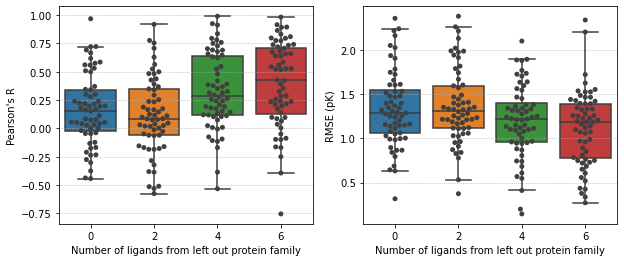

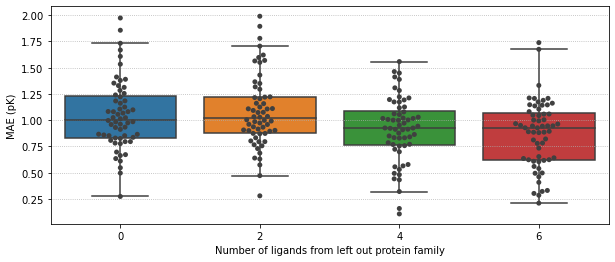

In [23]:
fig,axes = plt.subplots(1,2,figsize=(10,4))
# fig.add_subplot(121)
plt.axes(axes[0])
full_PearsonR = pd.DataFrame([ns_stats['PearsonR'],fs2_stats['PearsonR'],fs4_stats['PearsonR'],fs6_stats['PearsonR']]).T
full_PearsonR.columns=['0','2','4','6']
sns.boxplot(data=full_PearsonR, showfliers=False)
sns.swarmplot(data=full_PearsonR, color=".25")
plt.xlabel('Number of ligands from left out protein family')
plt.ylabel(PR_lab)
ax = plt.gca()
ax.grid(axis='y',linestyle=':')
# fig.add_subplot(221)
plt.axes(axes[1])
full_RMSE = pd.DataFrame([ns_stats['RMSE'],fs2_stats['RMSE'],fs4_stats['RMSE'],fs6_stats['RMSE']]).T
full_RMSE.columns=['0','2','4','6']
sns.boxplot(data=full_RMSE, showfliers=False)
sns.swarmplot(data=full_RMSE, color=".25")
plt.xlabel('Number of ligands from left out protein family')
plt.ylabel(RMSE_lab)
ax = plt.gca()
ax.grid(axis='y',linestyle=':')
plt.savefig('figs/loo-pfam-fs.pdf',bbox_inches="tight")
plt.figure(figsize=(10,4))
full_MAE = pd.DataFrame([ns_stats['MAE'],fs2_stats['MAE'],fs4_stats['MAE'],fs6_stats['MAE']]).T
full_MAE.columns=['0','2','4','6']
sns.boxplot(data=full_MAE, showfliers=False)
sns.swarmplot(data=full_MAE, color=".25")
plt.xlabel('Number of ligands from left out protein family')
plt.ylabel(MAE_lab)
ax = plt.gca()
ax.grid(axis='y',linestyle=':')
plt.savefig('figs/loo-pfam-mae.pdf')

In [6]:
for df in [ns_stats,fs6_stats]:
    print("min:",df['PearsonR'].min())
    print("max:",df['PearsonR'].max())

min: -0.4422
max: 0.968
min: -0.7544
max: 0.9826


# Evaluating External Finetune

In [24]:
def create_external_stats(model_save_path,num_runs = 25,model="multtask_latent_def2018",
                 num_addnl=1,weight_decay=0,ddg_weight=10,consistency_weight=1,
                absolute_weight=1,rotation_weight=1,use_weights=None,spec_name='',
                 rot_warmup=0,state="finished",tag='MseLoss',dset=None,spec_test=None,correlation=False, return_vals=False):
    runs = glob(f'{model_save_path}*_{spec_name}.h5')
    assert len(runs) == num_runs, f"only have {len(runs)} runs"
    rands = []
    stats_list = []
    for idx, run in enumerate(sorted(runs)):
        print(run)
        rand = run.split('/')[-1].split('_')[1]
        randval = int(rand.replace('rand',''))
        # else:
        #     rand = run.split('/')[-1].split('.')[0].split('_')[2]
        #     randval = int(rand.replace('rand',''))

        rands.append(randval)

        if dset:
            config = Namespace(testfile=f'external_test/{dset}/{dset}_DDG_TE.types',
                    ligte=f'cache/lig_{dset}.molcache2',
                    recte=f'cache/rec_{dset}.molcache2',
                    use_model=model,binary_rep=False,dropout=0,hidden_size=0)
            if spec_test:
                config.testfile = f"external_test/{config.testfile.split('/')[1]}/{config.testfile.split('/')[1]}_DDG_gt.types"
                print(config.testfile)
        else:
            config = Namespace(testfile=f'external_test/{ model_save_path.split("/")[-2] }/{ model_save_path.split("/")[-2] }_DDG_TE.types',
                    ligte=f'cache/lig_{ model_save_path.split("/")[-2] }.molcache2',
                    recte=f'cache/rec_{ model_save_path.split("/")[-2] }.molcache2',
                    use_model=model,binary_rep=False,dropout=0,hidden_size=0)
            if spec_test:
                config.testfile = f"external_test/{config.testfile.split('/')[1]}/{config.testfile.split('/')[1]}_DDG_{spec_test}TT.types"
                print(config.testfile)
            
        if return_vals == True:
            r, rmse, mae, vals, sr,tau = get_eval(config,run,correlation=correlation,return_vals=True)
        else:
            r, rmse, mae, sr,tau, = get_eval(config,run,correlation=correlation)
        curr_stats = [randval, r[0],rmse[0],mae[0],
                                r[1],rmse[1],mae[1]]
        if correlation == True:
            # [randval, r[0],rmse[0],mae[0],sr,tau,
            #                     r[1],rmse[1],mae[1]]
            curr_stats.insert(4,sr)
            curr_stats.insert(5,tau)
        if return_vals == True:
            curr_stats += [vals[0],vals[1]]
        stats_list.append(curr_stats)
    columns = ['randval','PearsonR','RMSE','MAE','Abs_PearsonR','Abs_RMSE','Abs_MAE']
    if correlation == True:
        # columns=['randval','PearsonR','RMSE','MAE','SpearmanR','Tau','Abs_PearsonR','Abs_RMSE','Abs_MAE'
        columns.insert(4,'SpearmanR')
        columns.insert(5,'Tau')
    if return_vals == True:
        columns += ['Predicted','Actual']

    final_stats = pd.DataFrame(stats_list,columns=columns)
    final_stats.to_csv(f"{model_save_path}statistics{spec_name}.csv",index=False,float_format="%.4f")
    return final_stats

In [161]:
alueError: RGBA sequence should have length 3 or 4
dset='cdk8'
config = Namespace(testfile=f'external_test/{dset}/{dset}_DDG_TE.types',
                    ligte=f'cache/lig_{dset}.molcache2',
                    recte=f'cache/rec_{dset}.molcache2',
                    use_model='multtask_latent_def2018',binary_rep=False,dropout=0,hidden_size=0)
get_eval(config,'models/full_train/def2018/model_0_def2018.h5',correlation=True)


27648
not return vals


((0.22897671637372127, 0.13571290753039775),
 (1.4693581425077327, 2.502181002272451),
 (1.1072218568078824, 2.1081205267255427),
 0.23520198186437527,
 0.16287633862521986)

In [320]:
# measurements= ['PearsonR','RMSE','MAE','Abs_PearsonR','Abs_RMSE','Abs_MAE']
# for external_set in ['BACE','BRD4','CDK2',"JNK1",'MCL1','P38',"PTP1B","Thrombin","TYK2"]:
#     compile_stats = []
#     for df, addnl in zip([create_external_stats(f'models/full_train/def2018/', spec_name=f'def2018', dset=f'{external_set}')]+[create_external_stats(f'models/full_train/def2018/{external_set}/', spec_name=f'finetune_{external_set}_{val}') for val in range(2,8)],[val for val in range(7)]):
#         compile_stats.append([addnl]+df[measurements].mean().tolist() + df[measurements].std().tolist())
#     full_stats = pd.DataFrame(compile_stats, columns=['addnl'] + [f"{stat}_{meas}" for stat in ['mean','std'] for meas in measurements ] )
#     full_stats.to_csv(f'models/full_train/def2018/{external_set}/statistics_fs.csv')

models/full_train/def2018/model_0_def2018.h5
27648
models/full_train/def2018/model_10_def2018.h5
27648
models/full_train/def2018/model_11_def2018.h5
27648
models/full_train/def2018/model_12_def2018.h5
27648
models/full_train/def2018/model_13_def2018.h5
27648
models/full_train/def2018/model_14_def2018.h5
27648
models/full_train/def2018/model_15_def2018.h5
27648
models/full_train/def2018/model_16_def2018.h5
27648
models/full_train/def2018/model_17_def2018.h5
27648
models/full_train/def2018/model_18_def2018.h5
27648
models/full_train/def2018/model_19_def2018.h5
27648
models/full_train/def2018/model_1_def2018.h5
27648
models/full_train/def2018/model_20_def2018.h5
27648
models/full_train/def2018/model_21_def2018.h5
27648
models/full_train/def2018/model_22_def2018.h5
27648
models/full_train/def2018/model_23_def2018.h5
27648
models/full_train/def2018/model_24_def2018.h5
27648
models/full_train/def2018/model_2_def2018.h5
27648
models/full_train/def2018/model_3_def2018.h5
27648
models/full_trai

models/full_train/def2018/BACE/def2018_13_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_14_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_15_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_16_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_17_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_18_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_19_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_1_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_20_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_21_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_22_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_23_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_24_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_2_finetune_BACE_6.h5
27648
models/full_train/def2018/BACE/def2018_3_finetune_BACE_6.h5
2764

models/full_train/def2018/BRD4/def2018_18_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_19_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_1_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_20_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_21_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_22_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_23_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_24_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_2_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_3_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_4_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_5_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_6_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_7_finetune_BRD4_4.h5
27648
models/full_train/def2018/BRD4/def2018_8_finetune_BRD4_4.h5
27648
mod

models/full_train/def2018/CDK2/def2018_21_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_22_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_23_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_24_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_2_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_3_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_4_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_5_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_6_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_7_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_8_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_9_finetune_CDK2_2.h5
27648
models/full_train/def2018/CDK2/def2018_0_finetune_CDK2_3.h5
27648
models/full_train/def2018/CDK2/def2018_10_finetune_CDK2_3.h5
27648
models/full_train/def2018/CDK2/def2018_11_finetune_CDK2_3.h5
27648
mode

models/full_train/def2018/CDK2/def2018_20_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_21_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_22_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_23_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_24_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_2_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_3_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_4_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_5_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_6_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_7_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_8_finetune_CDK2_7.h5
27648
models/full_train/def2018/CDK2/def2018_9_finetune_CDK2_7.h5
27648
models/full_train/def2018/model_0_def2018.h5
27648
models/full_train/def2018/model_10_def2018.h5
27648
models/full_train/def2018/model_11

models/full_train/def2018/JNK1/def2018_24_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_2_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_3_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_4_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_5_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_6_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_7_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_8_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_9_finetune_JNK1_5.h5
27648
models/full_train/def2018/JNK1/def2018_0_finetune_JNK1_6.h5
27648
models/full_train/def2018/JNK1/def2018_10_finetune_JNK1_6.h5
27648
models/full_train/def2018/JNK1/def2018_11_finetune_JNK1_6.h5
27648
models/full_train/def2018/JNK1/def2018_12_finetune_JNK1_6.h5
27648
models/full_train/def2018/JNK1/def2018_13_finetune_JNK1_6.h5
27648
models/full_train/def2018/JNK1/def2018_14_finetune_JNK1_6.h5
27648
mode

models/full_train/def2018/MCL1/def2018_5_finetune_MCL1_3.h5
27648
models/full_train/def2018/MCL1/def2018_6_finetune_MCL1_3.h5
27648
models/full_train/def2018/MCL1/def2018_7_finetune_MCL1_3.h5
27648
models/full_train/def2018/MCL1/def2018_8_finetune_MCL1_3.h5
27648
models/full_train/def2018/MCL1/def2018_9_finetune_MCL1_3.h5
27648
models/full_train/def2018/MCL1/def2018_0_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_10_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_11_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_12_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_13_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_14_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_15_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_16_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_17_finetune_MCL1_4.h5
27648
models/full_train/def2018/MCL1/def2018_18_finetune_MCL1_4.h5
27648
m

models/full_train/def2018/model_9_def2018.h5
27648
models/full_train/def2018/P38/def2018_0_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_10_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_11_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_12_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_13_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_14_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_15_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_16_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_17_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_18_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_19_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_1_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_20_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_21_finetune_P38_2.h5
27648
models/full_train/def2018/P38/def2018_22_

models/full_train/def2018/P38/def2018_11_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_12_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_13_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_14_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_15_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_16_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_17_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_18_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_19_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_1_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_20_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_21_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_22_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_23_finetune_P38_7.h5
27648
models/full_train/def2018/P38/def2018_24_finetune_P38_7.h5
27648
models/full_train/def2018/

models/full_train/def2018/PTP1B/def2018_13_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_14_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_15_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_16_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_17_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_18_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_19_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_1_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_20_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_21_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_22_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_23_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_24_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2018_2_finetune_PTP1B_5.h5
27648
models/full_train/def2018/PTP1B/def2

models/full_train/def2018/Thrombin/def2018_12_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_13_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_14_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_15_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_16_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_17_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_18_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_19_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_1_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_20_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_21_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_22_finetune_Thrombin_3.h5
27648
models/full_train/def2018/Thrombin/def2018_23_finetune_Thrombin_3.h5
27648
models/full_train/def2018/

models/full_train/def2018/Thrombin/def2018_23_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_24_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_2_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_3_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_4_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_5_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_6_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_7_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_8_finetune_Thrombin_7.h5
27648
models/full_train/def2018/Thrombin/def2018_9_finetune_Thrombin_7.h5
27648
models/full_train/def2018/model_0_def2018.h5
27648
models/full_train/def2018/model_10_def2018.h5
27648
models/full_train/def2018/model_11_def2018.h5
27648
models/full_train/def2018/model_12_def2018.h5
27648
models/full_train/def2018/model_13_def2018.h5
27648

models/full_train/def2018/TYK2/def2018_3_finetune_TYK2_5.h5
27648
models/full_train/def2018/TYK2/def2018_4_finetune_TYK2_5.h5
27648
models/full_train/def2018/TYK2/def2018_5_finetune_TYK2_5.h5
27648
models/full_train/def2018/TYK2/def2018_6_finetune_TYK2_5.h5
27648
models/full_train/def2018/TYK2/def2018_7_finetune_TYK2_5.h5
27648
models/full_train/def2018/TYK2/def2018_8_finetune_TYK2_5.h5
27648
models/full_train/def2018/TYK2/def2018_9_finetune_TYK2_5.h5
27648
models/full_train/def2018/TYK2/def2018_0_finetune_TYK2_6.h5
27648
models/full_train/def2018/TYK2/def2018_10_finetune_TYK2_6.h5
27648
models/full_train/def2018/TYK2/def2018_11_finetune_TYK2_6.h5
27648
models/full_train/def2018/TYK2/def2018_12_finetune_TYK2_6.h5
27648
models/full_train/def2018/TYK2/def2018_13_finetune_TYK2_6.h5
27648
models/full_train/def2018/TYK2/def2018_14_finetune_TYK2_6.h5
27648
models/full_train/def2018/TYK2/def2018_15_finetune_TYK2_6.h5
27648
models/full_train/def2018/TYK2/def2018_16_finetune_TYK2_6.h5
27648
mod

In [321]:
# Dense
# measurements= ['PearsonR','RMSE','MAE','Abs_PearsonR','Abs_RMSE','Abs_MAE']
# for external_set in ['BACE','BRD4','CDK2',"JNK1",'MCL1','P38',"PTP1B","Thrombin","TYK2"]:
#     compile_stats = []
#     for df, addnl in zip([create_external_stats(f'models/full_train/dense/', spec_name=f'dense', dset=f'{external_set}', num_runs=5, model='multtask_latent_dense')]+[create_external_stats(f'models/full_train/dense/{external_set}/', spec_name=f'finetune_{external_set}_{val}', num_runs=5, model='multtask_latent_dense') for val in range(2,8)],[val for val in range(7)]):
#         compile_stats.append([addnl]+df[measurements].mean().tolist() + df[measurements].std().tolist())
#     full_stats = pd.DataFrame(compile_stats, columns=['addnl'] + [f"{stat}_{meas}" for stat in ['mean','std'] for meas in measurements ] )
#     full_stats.to_csv(f'models/full_train/dense/{external_set}/statistics_fs.csv')

models/full_train/dense/model_0_dense.h5
models/full_train/dense/model_1_dense.h5
models/full_train/dense/model_2_dense.h5
models/full_train/dense/model_3_dense.h5
models/full_train/dense/model_4_dense.h5
models/full_train/dense/BACE/dense_0_finetune_BACE_2.h5
models/full_train/dense/BACE/dense_1_finetune_BACE_2.h5
models/full_train/dense/BACE/dense_2_finetune_BACE_2.h5
models/full_train/dense/BACE/dense_3_finetune_BACE_2.h5
models/full_train/dense/BACE/dense_4_finetune_BACE_2.h5
models/full_train/dense/BACE/dense_0_finetune_BACE_3.h5
models/full_train/dense/BACE/dense_1_finetune_BACE_3.h5
models/full_train/dense/BACE/dense_2_finetune_BACE_3.h5
models/full_train/dense/BACE/dense_3_finetune_BACE_3.h5
models/full_train/dense/BACE/dense_4_finetune_BACE_3.h5
models/full_train/dense/BACE/dense_0_finetune_BACE_4.h5
models/full_train/dense/BACE/dense_1_finetune_BACE_4.h5
models/full_train/dense/BACE/dense_2_finetune_BACE_4.h5
models/full_train/dense/BACE/dense_3_finetune_BACE_4.h5
models/full

models/full_train/dense/MCL1/dense_3_finetune_MCL1_3.h5
models/full_train/dense/MCL1/dense_4_finetune_MCL1_3.h5
models/full_train/dense/MCL1/dense_0_finetune_MCL1_4.h5
models/full_train/dense/MCL1/dense_1_finetune_MCL1_4.h5
models/full_train/dense/MCL1/dense_2_finetune_MCL1_4.h5
models/full_train/dense/MCL1/dense_3_finetune_MCL1_4.h5
models/full_train/dense/MCL1/dense_4_finetune_MCL1_4.h5
models/full_train/dense/MCL1/dense_0_finetune_MCL1_5.h5
models/full_train/dense/MCL1/dense_1_finetune_MCL1_5.h5
models/full_train/dense/MCL1/dense_2_finetune_MCL1_5.h5
models/full_train/dense/MCL1/dense_3_finetune_MCL1_5.h5
models/full_train/dense/MCL1/dense_4_finetune_MCL1_5.h5
models/full_train/dense/MCL1/dense_0_finetune_MCL1_6.h5
models/full_train/dense/MCL1/dense_1_finetune_MCL1_6.h5
models/full_train/dense/MCL1/dense_2_finetune_MCL1_6.h5
models/full_train/dense/MCL1/dense_3_finetune_MCL1_6.h5
models/full_train/dense/MCL1/dense_4_finetune_MCL1_6.h5
models/full_train/dense/MCL1/dense_0_finetune_MC

models/full_train/dense/TYK2/dense_1_finetune_TYK2_5.h5
models/full_train/dense/TYK2/dense_2_finetune_TYK2_5.h5
models/full_train/dense/TYK2/dense_3_finetune_TYK2_5.h5
models/full_train/dense/TYK2/dense_4_finetune_TYK2_5.h5
models/full_train/dense/TYK2/dense_0_finetune_TYK2_6.h5
models/full_train/dense/TYK2/dense_1_finetune_TYK2_6.h5
models/full_train/dense/TYK2/dense_2_finetune_TYK2_6.h5
models/full_train/dense/TYK2/dense_3_finetune_TYK2_6.h5
models/full_train/dense/TYK2/dense_4_finetune_TYK2_6.h5
models/full_train/dense/TYK2/dense_0_finetune_TYK2_7.h5
models/full_train/dense/TYK2/dense_1_finetune_TYK2_7.h5
models/full_train/dense/TYK2/dense_2_finetune_TYK2_7.h5
models/full_train/dense/TYK2/dense_3_finetune_TYK2_7.h5
models/full_train/dense/TYK2/dense_4_finetune_TYK2_7.h5


In [322]:
# measurements= ['PearsonR','RMSE','MAE','Abs_PearsonR','Abs_RMSE','Abs_MAE']
# for external_set in ['BACE','BRD4','CDK2',"JNK1",'MCL1','P38',"PTP1B","Thrombin","TYK2"]:
#     compile_stats = []
#     compile_stats_dense = []
#     for df, addnl in zip([create_external_stats(f'models/full_train/def2018/', spec_name=f'def2018', dset=f'{external_set}')]+[create_external_stats(f'models/full_train/def2018/{external_set}/', spec_name=f'finetune_{external_set}_{val}_hlr') for val in range(2,8)],[val for val in range(7)]):
#         compile_stats.append([addnl]+df[measurements].mean().tolist() + df[measurements].std().tolist())
#     full_stats = pd.DataFrame(compile_stats, columns=['addnl'] + [f"{stat}_{meas}" for stat in ['mean','std'] for meas in measurements ] )
#     full_stats.to_csv(f'models/full_train/def2018/{external_set}/statistics_fs_hlr.csv')
#     for df, addnl in zip([create_external_stats(f'models/full_train/dense/', spec_name=f'dense', dset=f'{external_set}',num_runs=5,model='multtask_latent_dense')]+[create_external_stats(f'models/full_train/dense/{external_set}/', spec_name=f'finetune_{external_set}_{val}_hlr',num_runs=5,model='multtask_latent_dense') for val in range(2,8)],[val for val in range(7)]):
#         compile_stats_dense.append([addnl]+df[measurements].mean().tolist() + df[measurements].std().tolist())
#     full_stats = pd.DataFrame(compile_stats_dense, columns=['addnl'] + [f"{stat}_{meas}" for stat in ['mean','std'] for meas in measurements ] )
#     full_stats.to_csv(f'models/full_train/dense/{external_set}/statistics_fs_hlr.csv')

models/full_train/def2018/model_0_def2018.h5
27648
models/full_train/def2018/model_10_def2018.h5
27648
models/full_train/def2018/model_11_def2018.h5
27648
models/full_train/def2018/model_12_def2018.h5
27648
models/full_train/def2018/model_13_def2018.h5
27648
models/full_train/def2018/model_14_def2018.h5
27648
models/full_train/def2018/model_15_def2018.h5
27648
models/full_train/def2018/model_16_def2018.h5
27648
models/full_train/def2018/model_17_def2018.h5
27648
models/full_train/def2018/model_18_def2018.h5
27648
models/full_train/def2018/model_19_def2018.h5
27648
models/full_train/def2018/model_1_def2018.h5
27648
models/full_train/def2018/model_20_def2018.h5
27648
models/full_train/def2018/model_21_def2018.h5
27648
models/full_train/def2018/model_22_def2018.h5
27648
models/full_train/def2018/model_23_def2018.h5
27648
models/full_train/def2018/model_24_def2018.h5
27648
models/full_train/def2018/model_2_def2018.h5
27648
models/full_train/def2018/model_3_def2018.h5
27648
models/full_trai

models/full_train/def2018/BACE/def2018_8_finetune_BACE_5_hlr.h5
27648
models/full_train/def2018/BACE/def2018_9_finetune_BACE_5_hlr.h5
27648
models/full_train/def2018/BACE/def2018_0_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_10_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_11_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_12_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_13_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_14_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_15_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_16_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_17_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_18_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_19_finetune_BACE_6_hlr.h5
27648
models/full_train/def2018/BACE/def2018_1_finetune_BACE_6_hlr.h5
27648
models/ful

models/full_train/def2018/BRD4/def2018_3_finetune_BRD4_2_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_4_finetune_BRD4_2_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_5_finetune_BRD4_2_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_6_finetune_BRD4_2_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_7_finetune_BRD4_2_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_8_finetune_BRD4_2_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_9_finetune_BRD4_2_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_0_finetune_BRD4_3_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_10_finetune_BRD4_3_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_11_finetune_BRD4_3_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_12_finetune_BRD4_3_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_13_finetune_BRD4_3_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_14_finetune_BRD4_3_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_15_finetune_BRD4_3_hlr.h5
27648
models/full_tr

models/full_train/def2018/BRD4/def2018_22_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_23_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_24_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_2_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_3_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_4_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_5_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_6_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_7_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_8_finetune_BRD4_7_hlr.h5
27648
models/full_train/def2018/BRD4/def2018_9_finetune_BRD4_7_hlr.h5
27648
models/full_train/dense/model_0_dense.h5
models/full_train/dense/model_1_dense.h5
models/full_train/dense/model_2_dense.h5
models/full_train/dense/model_3_dense.h5
models/full_train/dense/model_4_dense.h5
models/full_train/dens

models/full_train/def2018/CDK2/def2018_18_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_19_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_1_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_20_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_21_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_22_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_23_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_24_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_2_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_3_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_4_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_5_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_6_finetune_CDK2_4_hlr.h5
27648
models/full_train/def2018/CDK2/def2018_7_finetune_CDK2_4_hlr.h5
27648
models/full_t

models/full_train/dense/CDK2/dense_2_finetune_CDK2_7_hlr.h5
models/full_train/dense/CDK2/dense_3_finetune_CDK2_7_hlr.h5
models/full_train/dense/CDK2/dense_4_finetune_CDK2_7_hlr.h5
models/full_train/def2018/model_0_def2018.h5
27648
models/full_train/def2018/model_10_def2018.h5
27648
models/full_train/def2018/model_11_def2018.h5
27648
models/full_train/def2018/model_12_def2018.h5
27648
models/full_train/def2018/model_13_def2018.h5
27648
models/full_train/def2018/model_14_def2018.h5
27648
models/full_train/def2018/model_15_def2018.h5
27648
models/full_train/def2018/model_16_def2018.h5
27648
models/full_train/def2018/model_17_def2018.h5
27648
models/full_train/def2018/model_18_def2018.h5
27648
models/full_train/def2018/model_19_def2018.h5
27648
models/full_train/def2018/model_1_def2018.h5
27648
models/full_train/def2018/model_20_def2018.h5
27648
models/full_train/def2018/model_21_def2018.h5
27648
models/full_train/def2018/model_22_def2018.h5
27648
models/full_train/def2018/model_23_def2018

models/full_train/def2018/JNK1/def2018_6_finetune_JNK1_5_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_7_finetune_JNK1_5_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_8_finetune_JNK1_5_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_9_finetune_JNK1_5_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_0_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_10_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_11_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_12_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_13_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_14_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_15_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_16_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_17_finetune_JNK1_6_hlr.h5
27648
models/full_train/def2018/JNK1/def2018_18_finetune_JNK1_6_hlr.h5
27648
models/full

models/full_train/def2018/MCL1/def2018_24_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_2_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_3_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_4_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_5_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_6_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_7_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_8_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_9_finetune_MCL1_2_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_0_finetune_MCL1_3_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_10_finetune_MCL1_3_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_11_finetune_MCL1_3_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_12_finetune_MCL1_3_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_13_finetune_MCL1_3_hlr.h5
27648
models/full_tra

models/full_train/def2018/MCL1/def2018_17_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_18_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_19_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_1_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_20_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_21_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_22_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_23_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_24_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_2_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_3_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_4_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_5_finetune_MCL1_7_hlr.h5
27648
models/full_train/def2018/MCL1/def2018_6_finetune_MCL1_7_hlr.h5
27648
models/full_

models/full_train/def2018/P38/def2018_13_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_14_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_15_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_16_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_17_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_18_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_19_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_1_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_20_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_21_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_22_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_23_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_24_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def2018_2_finetune_P38_4_hlr.h5
27648
models/full_train/def2018/P38/def201

models/full_train/dense/P38/dense_0_finetune_P38_7_hlr.h5
models/full_train/dense/P38/dense_1_finetune_P38_7_hlr.h5
models/full_train/dense/P38/dense_2_finetune_P38_7_hlr.h5
models/full_train/dense/P38/dense_3_finetune_P38_7_hlr.h5
models/full_train/dense/P38/dense_4_finetune_P38_7_hlr.h5
models/full_train/def2018/model_0_def2018.h5
27648
models/full_train/def2018/model_10_def2018.h5
27648
models/full_train/def2018/model_11_def2018.h5
27648
models/full_train/def2018/model_12_def2018.h5
27648
models/full_train/def2018/model_13_def2018.h5
27648
models/full_train/def2018/model_14_def2018.h5
27648
models/full_train/def2018/model_15_def2018.h5
27648
models/full_train/def2018/model_16_def2018.h5
27648
models/full_train/def2018/model_17_def2018.h5
27648
models/full_train/def2018/model_18_def2018.h5
27648
models/full_train/def2018/model_19_def2018.h5
27648
models/full_train/def2018/model_1_def2018.h5
27648
models/full_train/def2018/model_20_def2018.h5
27648
models/full_train/def2018/model_21_d

models/full_train/def2018/PTP1B/def2018_2_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_3_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_4_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_5_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_6_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_7_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_8_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_9_finetune_PTP1B_5_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_0_finetune_PTP1B_6_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_10_finetune_PTP1B_6_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_11_finetune_PTP1B_6_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_12_finetune_PTP1B_6_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_13_finetune_PTP1B_6_hlr.h5
27648
models/full_train/def2018/PTP1B/def2018_14_finetune_PTP1B_6_

models/full_train/def2018/Thrombin/def2018_18_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_19_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_1_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_20_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_21_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_22_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_23_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_24_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_2_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_3_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_4_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_5_finetune_Thrombin_2_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_6_finetune_Thr

models/full_train/def2018/Thrombin/def2018_24_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_2_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_3_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_4_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_5_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_6_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_7_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_8_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_9_finetune_Thrombin_6_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_0_finetune_Thrombin_7_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_10_finetune_Thrombin_7_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_11_finetune_Thrombin_7_hlr.h5
27648
models/full_train/def2018/Thrombin/def2018_12_finetune_Thromb

models/full_train/def2018/TYK2/def2018_13_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_14_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_15_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_16_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_17_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_18_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_19_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_1_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_20_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_21_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_22_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_23_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_24_finetune_TYK2_3_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_2_finetune_TYK2_3_hlr.h5
27648
models/f

models/full_train/def2018/TYK2/def2018_6_finetune_TYK2_7_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_7_finetune_TYK2_7_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_8_finetune_TYK2_7_hlr.h5
27648
models/full_train/def2018/TYK2/def2018_9_finetune_TYK2_7_hlr.h5
27648
models/full_train/dense/model_0_dense.h5
models/full_train/dense/model_1_dense.h5
models/full_train/dense/model_2_dense.h5
models/full_train/dense/model_3_dense.h5
models/full_train/dense/model_4_dense.h5
models/full_train/dense/TYK2/dense_0_finetune_TYK2_2_hlr.h5
models/full_train/dense/TYK2/dense_1_finetune_TYK2_2_hlr.h5
models/full_train/dense/TYK2/dense_2_finetune_TYK2_2_hlr.h5
models/full_train/dense/TYK2/dense_3_finetune_TYK2_2_hlr.h5
models/full_train/dense/TYK2/dense_4_finetune_TYK2_2_hlr.h5
models/full_train/dense/TYK2/dense_0_finetune_TYK2_3_hlr.h5
models/full_train/dense/TYK2/dense_1_finetune_TYK2_3_hlr.h5
models/full_train/dense/TYK2/dense_2_finetune_TYK2_3_hlr.h5
models/full_train/dense/TYK2/dense_

In [7]:
external_set_def2018 = {dset:pd.read_csv(f'models/full_train/def2018/{dset}/statistics_fs.csv') for dset in["BACE","BRD4","CDK2","JNK1","MCL1","P38","PTP1B","Thrombin","TYK2"] }
external_set_dense = {dset:pd.read_csv(f'models/full_train/dense/{dset}/statistics_fs.csv') for dset in["BACE","BRD4","CDK2","JNK1","MCL1","P38","PTP1B","Thrombin","TYK2"] }

In [21]:
paper_values = dict()
for filename in glob('external_test/*/Paper_*_R*.csv'):
    testset = filename.split('/')[1]
    measure = filename.split('_')[-1].split('.')[0]
    raw = pd.read_csv(filename,header=None)
    raw.columns = ['x','y']
    raw = raw.round({'x':0,'y':3})
    raw['x'] = raw['x'].abs()
    sorted_groupby = raw.sort_values(by=['x','y']).groupby('x')
    final = sorted_groupby.nth(1)
    final['std'] = (sorted_groupby.nth(2)-sorted_groupby.nth(0))/2
    if testset not in paper_values:
        paper_values[testset] = dict()
    paper_values[testset][measure] = final
paper_values.keys()

dict_keys(['Thrombin', 'P38', 'BACE', 'JNK1', 'PTP1B', 'CDK2', 'BRD4', 'MCL1', 'TYK2'])

In [22]:
FEP_results = pd.read_excel('/home/anm329/Downloads/AccReliable_results.xlsx')
FEP_results.dropna(axis=1,how='all',inplace=True)
FEP_results.dropna(axis=0,how='any',inplace=True)
FEP_results['PearsonR'] = FEP_results['R'].apply(lambda x: float(x.split('+')[0]))
FEP_results['actual_RMSE'] = FEP_results['RMSE'].apply(lambda x: float(x.split('+')[0]))
FEP_results['MAE'] = FEP_results['MUE'].apply(lambda x: float(x.split('+')[0]))
FEP_results.at[4,'System'] = 'P38'
FEP_results.at[2,'System'] = 'JNK1'
FEP_results.at[6,'System'] = 'TYK2'
FEP_results = FEP_results.append(pd.DataFrame([['BRD4',0.76,1.12]],columns=['System','PearsonR','actual_RMSE']))
FEP_results.set_index('System',inplace=True)
FEP_results

/home/anm329/anaconda3/envs/py38_torch/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,# ligands,# pertrubations,range (kcal/mol),Expected R2 EXP,Exp R Exp,Expected R2 FEP,Exp R FEP,R2,R,MUE,RMSE,PearsonR,actual_RMSE,MAE
System,,,,,,,,,,,,,,
BACE,36.0,58.0,3.50,0.77+-0.05,0.88+-0.03,0.41+-0.11,0.64+-0.09,0.61+-0.10,0.78+-0.07,0.84+-0.08,1.03+-0.08,0.78,1.03,0.84
CDK2,16.0,25.0,4.20,0.85+-0.05,0.92+-0.03,0.55+-0.14,0.73+-0.11,0.23+-0.19,0.48+-0.19,0.91+-0.12,1.11+-0.12,0.48,1.11,0.91
JNK1,21.0,31.0,3.40,0.77+-0.07,0.88+-0.04,0.42+-0.14,0.64+-0.12,0.72+-0.11,0.85+-0.07,0.78+-0.11,1.00+-0.14,0.85,1.00,0.78
MCL1,42.0,71.0,4.19,0.83+-0.04,0.91+-0.02,0.50+-0.09,0.71+-0.07,0.6+-0.07,0.77+-0.05,1.16+-0.09,1.41+-0.10,0.77,1.41,1.16
P38,34.0,56.0,3.78,0.80+-0.05,0.89+-0.03,0.45+-0.11,0.67+-0.08,0.43+-0.10,0.65+-0.09,0.80+-0.09,1.03+-0.10,0.65,1.03,0.80
Thrombin,11.0,16.0,1.70,0.48+-0.18,0.68+-0.15,0.20+-0.18,0.37+-0.26,0.5+-0.23,0.71+-0.24,0.76+-0.13,0.93+-0.15,0.71,0.93,0.76
TYK2,16.0,24.0,4.28,0.86+-0.05,0.92+-0.03,0.56+-0.14,0.74+-0.10,0.79+-0.11,0.89+-0.07,0.75+-0.11,0.93+-0.12,0.89,0.93,0.75
PTP1B,23.0,49.0,5.13,0.89+-0.03,0.94+-0.02,0.63+-0.10,0.79+-0.07,0.64+-0.12,0.80+-0.08,0.89+-0.12,1.22+-0.17,0.80,1.22,0.89
BRD4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.76,1.12,NaN


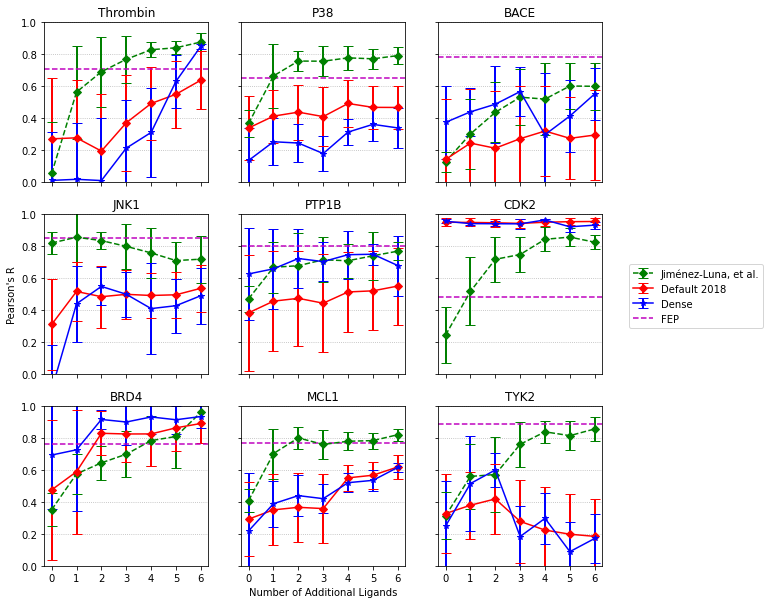

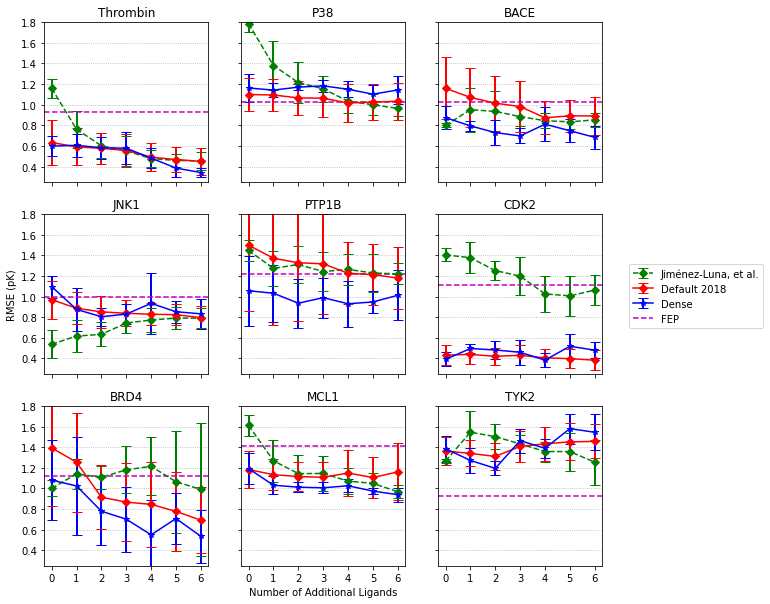

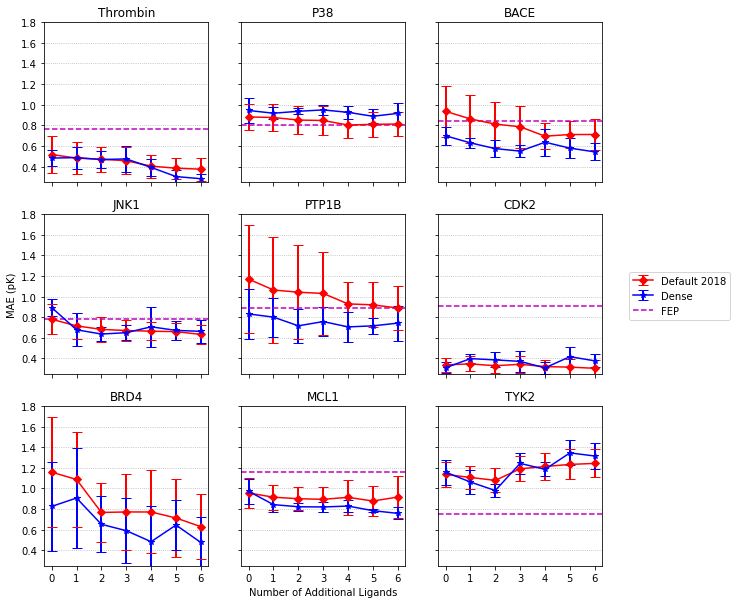

In [21]:
# external_ts = [ext_set.split('/')[-2] for ext_set in sorted(glob('external_test/*/'))]
rfig, raxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
rmsefig, rmseaxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
maefig, maeaxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
for idx, test_set in enumerate(paper_values.keys()):
    val = [idx // 3, idx % 3]
    raxes[val[0],val[1]].set_title(test_set)
    theirs = raxes[val[0],val[1]].errorbar(paper_values[test_set]['R'].index,paper_values[test_set]['R']['y'],yerr=paper_values[test_set]['R']['std'],label='Jiménez-Luna, et al.',c='g',linestyle='--',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    def2018 = raxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_PearsonR'],yerr=external_set_def2018[f'{test_set}']['std_PearsonR'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = raxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_PearsonR'],yerr=external_set_dense[f'{test_set}']['std_PearsonR'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')
    FEP = raxes[val[0],val[1]].axhline(FEP_results.loc[f'{test_set}']['PearsonR'],label='FEP',c='m',linestyle='--')

    if val[1] == 0 and val[0] == 1:
        raxes[val[0],val[1]].set_ylabel(PR_lab)
    if val[0] == 2 and val[1] == 1:
        raxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
#     raxes[val[0],val[1]].legend()
#     ax = plt.gca()
    
    raxes[val[0],val[1]].set_ylim(bottom=0,top=1)
    raxes[val[0],val[1]].locator_params(axis='both',nbins=7)
    raxes[val[0],val[1]].grid(axis='y',linestyle=':')
    if val[0] == 2 and val[1] == 2:
        r_leg = rfig.legend([theirs,def2018,dense,FEP],['Jiménez-Luna, et al.','Default 2018', 'Dense','FEP'],loc='center left',bbox_to_anchor=(0.93, 0.5))

    rmseaxes[val[0],val[1]].set_title(test_set)
    theirs= rmseaxes[val[0],val[1]].errorbar(paper_values[test_set]['RMSE'].index,paper_values[test_set]['RMSE']['y'],yerr=paper_values[test_set]['RMSE']['std'],label='Jiménez-Luna, et al.',c='g',linestyle='--',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    def2018 = rmseaxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_RMSE'],yerr=external_set_def2018[f'{test_set}']['std_RMSE'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = rmseaxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_RMSE'],yerr=external_set_dense[f'{test_set}']['std_RMSE'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')
    FEP = rmseaxes[val[0],val[1]].axhline(FEP_results.loc[f'{test_set}']['actual_RMSE'],label='FEP',c='m',linestyle='--')
    if val[0] == 2 and val[1] == 1:
        rmseaxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
    if val[1] == 0 and val[0] == 1:
        rmseaxes[val[0],val[1]].set_ylabel(RMSE_lab)
    if val[0] == 0 and val[1] == 2:
        rmse_leg = rmsefig.legend([theirs,def2018,dense,FEP],['Jiménez-Luna, et al.','Default 2018', 'Dense', 'FEP'],loc='center left',bbox_to_anchor=(.93, 0.5))
    rmseaxes[val[0],val[1]].grid(axis='y',linestyle=':')
    rmseaxes[val[0],val[1]].set_ylim(bottom=0.25,top=1.8)
    rmseaxes[val[0],val[1]].locator_params(axis='both',nbins=8)
    
    maeaxes[val[0],val[1]].set_title(test_set)
    def2018 = maeaxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_MAE'],yerr=external_set_def2018[f'{test_set}']['std_MAE'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = maeaxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_MAE'],yerr=external_set_dense[f'{test_set}']['std_MAE'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')
    FEP = maeaxes[val[0],val[1]].axhline(FEP_results.loc[f'{test_set}']['MAE'],label='FEP',c='m',linestyle='--')
    if val[0] == 2 and val[1] == 1:
        maeaxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
    if val[1] == 0 and val[0] == 1:
        maeaxes[val[0],val[1]].set_ylabel(MAE_lab)
    if val[0] == 2 and val[1] == 2:
        mae_leg = maefig.legend([def2018,dense,FEP],['Default 2018', 'Dense','FEP'],loc='center left',bbox_to_anchor=(0.93, 0.5))
    maeaxes[val[0],val[1]].grid(axis='y',linestyle=':')
    maeaxes[val[0],val[1]].set_ylim(bottom=0.25,top=1.8)
    maeaxes[val[0],val[1]].locator_params(axis='both',nbins=8)
rfig.savefig('figs/external_test_R.pdf',bbox_inches='tight',transparent=False)
rmsefig.savefig('figs/external_test_RMSE.pdf',bbox_inches='tight',transparent=False)
maefig.savefig('figs/external_test_MAE.pdf',bbox_inches='tight',transparent=False)

## Similarity of Mobley and Wang external sets

In [8]:
prot_dist, targets, lig_sim = pickle.load(open('fullbdb_external_simi.pickle', 'rb'))
better_targets = [target.split('_')[0] for target in targets]
external_targets = better_targets[-209:]
external_ind = list(range(len(targets) - len(external_targets), len(targets)))
set_ext_targs = list(set(external_targets))

In [9]:
with open('figs/external_simi_new.tex','w') as simi_tex:
    simi_tex.write(r"\begin{tabular}{lllll}\n")
    simi_tex.write('\\toprule\nExternal Dataset & Minimum Protein Distance (PDBID) & Max Ligand Similarity (\% of ligands at max similarity) & PearsonR & RMSE(pK) \\\\ \n \\midrule \n')
    for ex_idx, target in zip(external_ind,set_ext_targs):
        same_target = [i for i,x in enumerate(better_targets) if x == target]
        cur_prot_dist = np.delete(prot_dist[same_target[0]],same_target)
        min_prot_dist = min(cur_prot_dist)
        # simi_tex.write(f"\tMinimum Protein Distance:{min_prot_dist}({better_targets[np.argmin(cur_prot_dist)]})")
        max_simi, simi_ligs = [0 for lig in same_target], ['' for lig in same_target]
        for idx, lig in enumerate(same_target):
            cur_lig_sim = np.delete(lig_sim[lig],same_target)
            max_lig_sim = max(cur_lig_sim)
            if max_lig_sim > max_simi[idx]:
                max_simi[idx] = max_lig_sim
                simi_ligs[idx] = targets[np.argmax(cur_lig_sim)]
        # simi_tex.write(f"\tLigand Similarity:{max_simi}({simi_ligs})")
        simi_tex.write(f"{target} & {min_prot_dist} ({better_targets[np.argmin(cur_prot_dist)]}) & {np.max(max_simi)} ({np.sum(np.where(np.array(max_simi) == np.max(max_simi),1,0))/len(max_simi)*100:.1f}) & {external_set_def2018[target]['mean_PearsonR'][0]:.3f}({external_set_dense[target]['mean_PearsonR'][0]:.3f}) & {external_set_def2018[target]['mean_RMSE'][0]:.3f}({external_set_dense[target]['mean_RMSE'][0]:.3f})\\\\ \n")
    simi_tex.write("\\bottomrule\n\\end{tabular}\n")

# Look at no-shot performance on high similarity series
### CDK2 and PTP1B

In [44]:
for external_set in ['CDK2','PTP1B']:
    df = create_external_stats(f'models/full_train/def2018/', spec_name=f'def2018', dset=f'{external_set}',return_vals=True,spec_test=True)
    avg_pred = np.array(df['Predicted'].tolist()).mean(axis=0)
    actual = np.array(df['Actual'].tolist()[0])
    typesfile = pd.read_csv(f'external_test/{external_set}/{external_set}_DDG.types',sep=' ',header=None)
    typesfile.columns = ['cls','reg','dg1','dg2','rec','lig1','lig2']
    typesfile['pred'] = avg_pred
    typesfile.to_csv(f'external_test/{external_set}/{external_set}_DDGpreds.types',header=False,sep=' ',index=False)

models/full_train/def2018/model_0_def2018.h5
external_test/CDK2/CDK2_DDG_gt.types
external_test/CDK2/CDK2_DDG_gt.types 240
27648
return vals
models/full_train/def2018/model_10_def2018.h5
external_test/CDK2/CDK2_DDG_gt.types
external_test/CDK2/CDK2_DDG_gt.types 240
27648
return vals
models/full_train/def2018/model_11_def2018.h5
external_test/CDK2/CDK2_DDG_gt.types
external_test/CDK2/CDK2_DDG_gt.types 240
27648
return vals
models/full_train/def2018/model_12_def2018.h5
external_test/CDK2/CDK2_DDG_gt.types
external_test/CDK2/CDK2_DDG_gt.types 240
27648
return vals
models/full_train/def2018/model_13_def2018.h5
external_test/CDK2/CDK2_DDG_gt.types
external_test/CDK2/CDK2_DDG_gt.types 240
27648
return vals
models/full_train/def2018/model_14_def2018.h5
external_test/CDK2/CDK2_DDG_gt.types
external_test/CDK2/CDK2_DDG_gt.types 240
27648
return vals
models/full_train/def2018/model_15_def2018.h5
external_test/CDK2/CDK2_DDG_gt.types
external_test/CDK2/CDK2_DDG_gt.types 240
27648
return vals
models/

In [36]:
typesfile

,cls,reg,dg1,dg2,rec,lig1,lig2
0,1,0.3753,5.7764,5.4011,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG19.sdf,PTP1B/PTP1B_LIG18.sdf
1,1,0.0736,5.7764,5.7028,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG19.sdf,PTP1B/PTP1B_LIG12.sdf
2,1,0.0957,5.7764,5.6807,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG19.sdf,PTP1B/PTP1B_LIG1.sdf
3,1,0.0957,5.7764,5.6807,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG19.sdf,PTP1B/PTP1B_LIG5.sdf
4,1,0.0736,5.7764,5.7028,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG19.sdf,PTP1B/PTP1B_LIG16.sdf
...,...,...,...,...,...,...,...
501,0,-0.6475,7.4541,8.1016,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG23.sdf,PTP1B/PTP1B_LIG17.sdf
502,0,-1.7219,7.4541,9.1760,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG23.sdf,PTP1B/PTP1B_LIG6.sdf
503,0,-0.9492,7.4541,8.4033,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG23.sdf,PTP1B/PTP1B_LIG14.sdf
504,1,1.1185,7.4541,6.3356,PTP1B/PTP1B_PROT.pdb,PTP1B/PTP1B_LIG23.sdf,PTP1B/PTP1B_LIG7.sdf


In [31]:
print(len(df.Predicted[0]),len(df.Actual[0]))

512 512


# Large Scale FEP+ Benchmark

In [170]:
measurements= ['PearsonR','RMSE','MAE','SpearmanR','Tau','Abs_PearsonR','Abs_RMSE','Abs_MAE']

In [163]:
for external_set in ['cdk8','cmet','eg5','hif2a','pfkfb3','shp2','syk','tnks2']:
    compile_stats = []
    for df, addnl in zip([create_external_stats(f'models/full_train/def2018/', spec_name=f'def2018', dset=f'{external_set}', correlation=True)]+[create_external_stats(f'models/full_train/def2018/{external_set}/', spec_name=f'finetune2_{external_set}_{val}', correlation=True) for val in range(2,8)],[val for val in range(7)]):
        compile_stats.append([addnl]+df[measurements].mean().tolist() + df[measurements].std().tolist())
    full_stats = pd.DataFrame(compile_stats, columns=['addnl'] + [f"{stat}_{meas}" for stat in ['mean','std'] for meas in measurements ] )
    full_stats.to_csv(f'models/full_train/def2018/{external_set}/statistics_fs.csv')

models/full_train/def2018/model_0_def2018.h5
27648
not return vals
models/full_train/def2018/model_10_def2018.h5
27648
not return vals
models/full_train/def2018/model_11_def2018.h5
27648
not return vals
models/full_train/def2018/model_12_def2018.h5
27648
not return vals
models/full_train/def2018/model_13_def2018.h5
27648
not return vals
models/full_train/def2018/model_14_def2018.h5
27648
not return vals
models/full_train/def2018/model_15_def2018.h5
27648
not return vals
models/full_train/def2018/model_16_def2018.h5
27648
not return vals
models/full_train/def2018/model_17_def2018.h5
27648
not return vals
models/full_train/def2018/model_18_def2018.h5
27648
not return vals
models/full_train/def2018/model_19_def2018.h5
27648
not return vals
models/full_train/def2018/model_1_def2018.h5
27648
not return vals
models/full_train/def2018/model_20_def2018.h5
27648
not return vals
models/full_train/def2018/model_21_def2018.h5
27648
not return vals
models/full_train/def2018/model_22_def2018.h5
2764

not return vals
models/full_train/def2018/cdk8/def2018_12_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_13_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_14_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_15_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_16_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_17_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_18_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_19_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_1_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_20_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_21_finetune2_cdk8_5.h5
27648
not return vals
models/full_train/def2018/cdk8/def2018_22_finetune2_cdk8_5.h5

not return vals
models/full_train/def2018/cmet/def2018_15_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_16_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_17_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_18_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_19_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_1_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_20_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_21_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_22_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_23_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_24_finetune2_cmet_2.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_2_finetune2_cmet_2.h5


not return vals
models/full_train/def2018/cmet/def2018_14_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_15_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_16_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_17_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_18_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_19_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_1_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_20_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_21_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_22_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_23_finetune2_cmet_6.h5
27648
not return vals
models/full_train/def2018/cmet/def2018_24_finetune2_cmet_6.h5

not return vals
models/full_train/def2018/eg5/def2018_18_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_19_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_1_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_20_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_21_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_22_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_23_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_24_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_2_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_3_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_4_finetune2_eg5_3.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_5_finetune2_eg5_3.h5
27648
not return vals
model

not return vals
models/full_train/def2018/eg5/def2018_19_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_1_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_20_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_21_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_22_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_23_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_24_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_2_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_3_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_4_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_5_finetune2_eg5_7.h5
27648
not return vals
models/full_train/def2018/eg5/def2018_6_finetune2_eg5_7.h5
27648
not return vals
models

not return vals
models/full_train/def2018/hif2a/def2018_20_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_21_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_22_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_23_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_24_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_2_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_3_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_4_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_5_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_6_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_7_finetune2_hif2a_4.h5
27648
not return vals
models/full_train/def2018/hif2a/def2018_8_fi

not return vals
models/full_train/def2018/model_19_def2018.h5
27648
not return vals
models/full_train/def2018/model_1_def2018.h5
27648
not return vals
models/full_train/def2018/model_20_def2018.h5
27648
not return vals
models/full_train/def2018/model_21_def2018.h5
27648
not return vals
models/full_train/def2018/model_22_def2018.h5
27648
not return vals
models/full_train/def2018/model_23_def2018.h5
27648
not return vals
models/full_train/def2018/model_24_def2018.h5
27648
not return vals
models/full_train/def2018/model_2_def2018.h5
27648
not return vals
models/full_train/def2018/model_3_def2018.h5
27648
not return vals
models/full_train/def2018/model_4_def2018.h5
27648
not return vals
models/full_train/def2018/model_5_def2018.h5
27648
not return vals
models/full_train/def2018/model_6_def2018.h5
27648
not return vals
models/full_train/def2018/model_7_def2018.h5
27648
not return vals
models/full_train/def2018/model_8_def2018.h5
27648
not return vals
models/full_train/def2018/model_9_def201

not return vals
models/full_train/def2018/pfkfb3/def2018_16_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_17_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_18_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_19_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_1_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_20_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_21_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_22_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_23_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_24_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/def2018/pfkfb3/def2018_2_finetune2_pfkfb3_5.h5
27648
not return vals
models/full_train/

not return vals
models/full_train/def2018/shp2/def2018_16_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_17_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_18_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_19_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_1_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_20_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_21_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_22_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_23_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_24_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_2_finetune2_shp2_2.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_3_finetune2_shp2_2.h5
2

not return vals
models/full_train/def2018/shp2/def2018_15_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_16_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_17_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_18_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_19_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_1_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_20_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_21_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_22_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_23_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_24_finetune2_shp2_6.h5
27648
not return vals
models/full_train/def2018/shp2/def2018_2_finetune2_shp2_6.h5


not return vals
models/full_train/def2018/syk/def2018_19_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_1_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_20_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_21_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_22_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_23_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_24_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_2_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_3_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_4_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_5_finetune2_syk_3.h5
27648
not return vals
models/full_train/def2018/syk/def2018_6_finetune2_syk_3.h5
27648
not return vals
models

not return vals
models/full_train/def2018/syk/def2018_1_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_20_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_21_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_22_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_23_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_24_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_2_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_3_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_4_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_5_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_6_finetune2_syk_7.h5
27648
not return vals
models/full_train/def2018/syk/def2018_7_finetune2_syk_7.h5
27648
not return vals
models/

not return vals
models/full_train/def2018/tnks2/def2018_21_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_22_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_23_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_24_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_2_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_3_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_4_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_5_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_6_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_7_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_8_finetune2_tnks2_4.h5
27648
not return vals
models/full_train/def2018/tnks2/def2018_9_fin

In [174]:
for external_set in ['cdk8','cmet','eg5','hif2a','pfkfb3','shp2','syk','tnks2']:
    compile_stats = []
    for df, addnl in zip([create_external_stats(f'models/full_train/dense/', spec_name=f'dense', dset=f'{external_set}', num_runs=5, model='multtask_latent_dense', correlation=True)]+[create_external_stats(f'models/full_train/dense/{external_set}/', spec_name=f'finetune2_{external_set}_{val}', num_runs=5, model='multtask_latent_dense', correlation=True) for val in range(2,8)],[val for val in range(7)]):
        compile_stats.append([addnl]+df[measurements].mean().tolist() + df[measurements].std().tolist())
    full_stats = pd.DataFrame(compile_stats, columns=['addnl'] + [f"{stat}_{meas}" for stat in ['mean','std'] for meas in measurements ] )
    full_stats.to_csv(f'models/full_train/dense/{external_set}/statistics_fs.csv')

models/full_train/dense/model_0_dense.h5
not return vals
models/full_train/dense/model_1_dense.h5
not return vals
models/full_train/dense/model_2_dense.h5
not return vals
models/full_train/dense/model_3_dense.h5
not return vals
models/full_train/dense/model_4_dense.h5
not return vals
models/full_train/dense/cdk8/dense_0_finetune2_cdk8_2.h5
not return vals
models/full_train/dense/cdk8/dense_1_finetune2_cdk8_2.h5
not return vals
models/full_train/dense/cdk8/dense_2_finetune2_cdk8_2.h5
not return vals
models/full_train/dense/cdk8/dense_3_finetune2_cdk8_2.h5
not return vals
models/full_train/dense/cdk8/dense_4_finetune2_cdk8_2.h5
not return vals
models/full_train/dense/cdk8/dense_0_finetune2_cdk8_3.h5
not return vals
models/full_train/dense/cdk8/dense_1_finetune2_cdk8_3.h5
not return vals
models/full_train/dense/cdk8/dense_2_finetune2_cdk8_3.h5
not return vals
models/full_train/dense/cdk8/dense_3_finetune2_cdk8_3.h5
not return vals
models/full_train/dense/cdk8/dense_4_finetune2_cdk8_3.h5
n

not return vals
models/full_train/dense/hif2a/dense_3_finetune2_hif2a_3.h5
not return vals
models/full_train/dense/hif2a/dense_4_finetune2_hif2a_3.h5
not return vals
models/full_train/dense/hif2a/dense_0_finetune2_hif2a_4.h5
not return vals
models/full_train/dense/hif2a/dense_1_finetune2_hif2a_4.h5
not return vals
models/full_train/dense/hif2a/dense_2_finetune2_hif2a_4.h5
not return vals
models/full_train/dense/hif2a/dense_3_finetune2_hif2a_4.h5
not return vals
models/full_train/dense/hif2a/dense_4_finetune2_hif2a_4.h5
not return vals
models/full_train/dense/hif2a/dense_0_finetune2_hif2a_5.h5
not return vals
models/full_train/dense/hif2a/dense_1_finetune2_hif2a_5.h5
not return vals
models/full_train/dense/hif2a/dense_2_finetune2_hif2a_5.h5
not return vals
models/full_train/dense/hif2a/dense_3_finetune2_hif2a_5.h5
not return vals
models/full_train/dense/hif2a/dense_4_finetune2_hif2a_5.h5
not return vals
models/full_train/dense/hif2a/dense_0_finetune2_hif2a_6.h5
not return vals
models/fu

not return vals
models/full_train/dense/syk/dense_2_finetune2_syk_5.h5
not return vals
models/full_train/dense/syk/dense_3_finetune2_syk_5.h5
not return vals
models/full_train/dense/syk/dense_4_finetune2_syk_5.h5
not return vals
models/full_train/dense/syk/dense_0_finetune2_syk_6.h5
not return vals
models/full_train/dense/syk/dense_1_finetune2_syk_6.h5
not return vals
models/full_train/dense/syk/dense_2_finetune2_syk_6.h5
not return vals
models/full_train/dense/syk/dense_3_finetune2_syk_6.h5
not return vals
models/full_train/dense/syk/dense_4_finetune2_syk_6.h5
not return vals
models/full_train/dense/syk/dense_0_finetune2_syk_7.h5
not return vals
models/full_train/dense/syk/dense_1_finetune2_syk_7.h5
not return vals
models/full_train/dense/syk/dense_2_finetune2_syk_7.h5
not return vals
models/full_train/dense/syk/dense_3_finetune2_syk_7.h5
not return vals
models/full_train/dense/syk/dense_4_finetune2_syk_7.h5
not return vals
models/full_train/dense/model_0_dense.h5
not return vals
mode

In [7]:
external_set_def2018 = {dset:pd.read_csv(f'models/full_train/def2018/{dset}/statistics_fs.csv') for dset in ['cdk8','cmet','eg5','hif2a','pfkfb3','shp2','syk','tnks2'] }
external_set_dense = {dset:pd.read_csv(f'models/full_train/dense/{dset}/statistics_fs.csv') for dset in ['cdk8','cmet','eg5','hif2a','pfkfb3','shp2','syk','tnks2'] }

In [8]:
large_scale_results = pd.read_csv('/home/anm329/Downloads/LargeScale/table1.csv')
large_scale_results['MaxR'] = large_scale_results['Max_R2'].apply(lambda x: np.sqrt(float(x.split('[')[0])))
large_scale_results['FEPplusR'] = large_scale_results['FEPplus_R2'].apply(lambda x: np.sqrt(float(x.split('[')[0])))
large_scale_results['FEPplusRMSE'] = large_scale_results['FEPplus_RMSE_pw'].apply(lambda x: float(x.split('[')[0]))
large_scale_results['FEPplusSpearman'] = large_scale_results['FEPplus_rho'].apply(lambda x: float(x.split('[')[0]))
large_scale_results['FEPplusTau'] = large_scale_results['FEPplus_tau'].apply(lambda x: float(x.split('[')[0]))
large_scale_results['Max_Spearman'] = large_scale_results['Max_rho'].apply(lambda x: float(x.split('[')[0]))
large_scale_results['Max_Tau'] = large_scale_results['Max_tau'].apply(lambda x: float(x.split('[')[0]))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


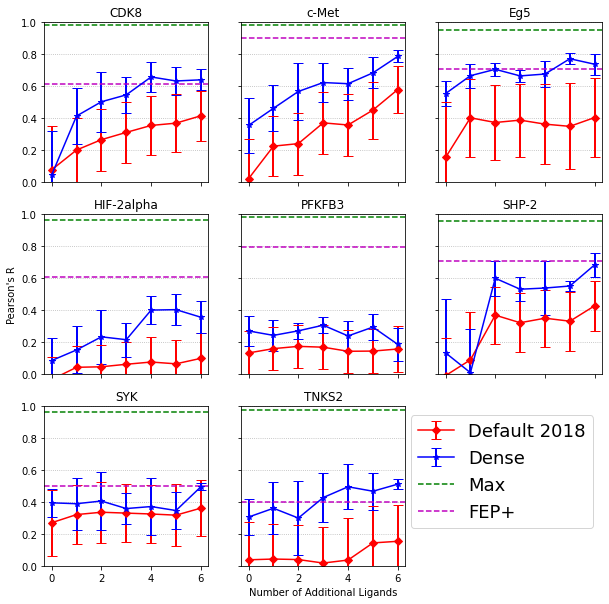

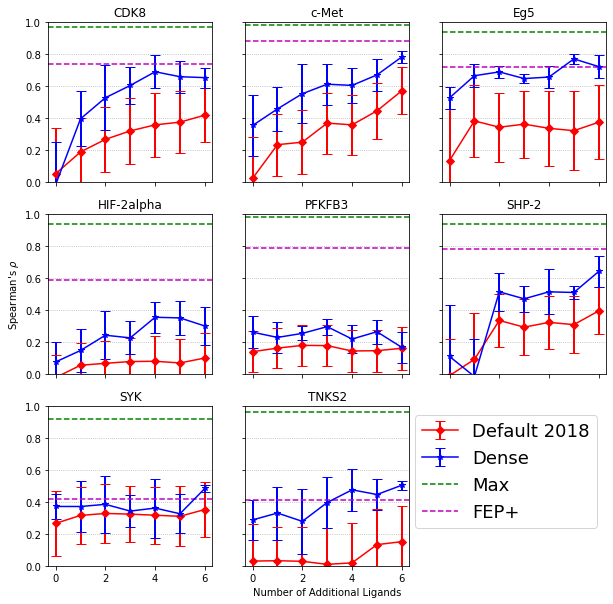

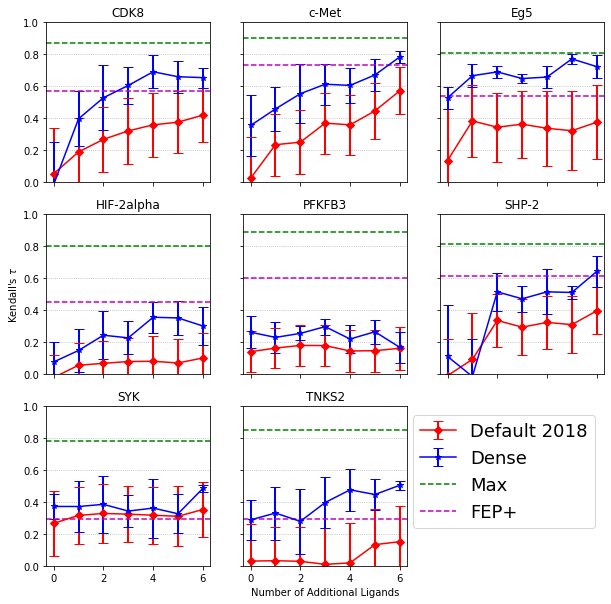

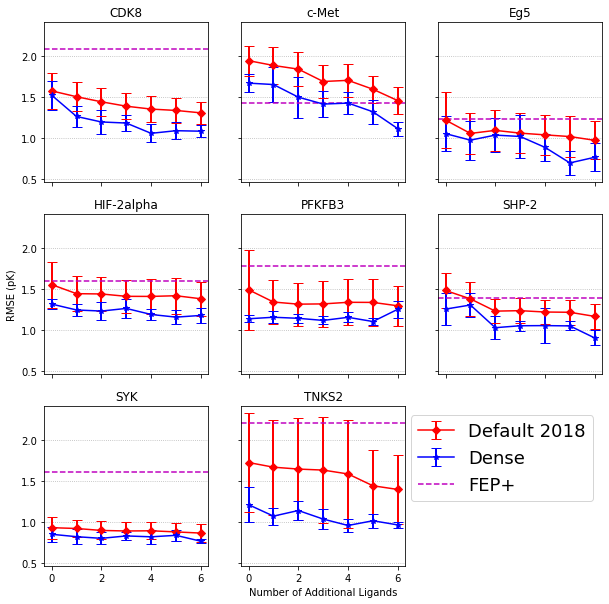

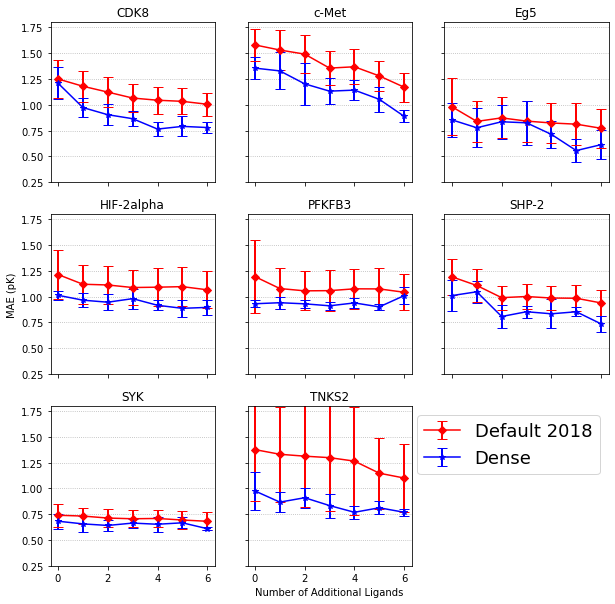

In [9]:
from matplotlib import ticker
tick_spacing = 1
# external_ts = [ext_set.split('/')[-2] for ext_set in sorted(glob('external_test/*/'))]
rfig, raxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
rhofig, rhoaxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
taufig, tauaxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
rmsefig, rmseaxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
maefig, maeaxes = plt.subplots(ncols=3,nrows=3,figsize=(10,10),sharex=True,sharey=True)
for idx, test_set in enumerate(['cdk8','cmet','eg5','hif2a','pfkfb3','shp2','syk','tnks2']):
    val = [idx // 3, idx % 3]
    raxes[val[0],val[1]].set_title(large_scale_results.iloc[idx]['Protein'])
    def2018 = raxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_PearsonR'],yerr=external_set_def2018[f'{test_set}']['std_PearsonR'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = raxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_PearsonR'],yerr=external_set_dense[f'{test_set}']['std_PearsonR'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')

    max_pos = raxes[val[0],val[1]].axhline(large_scale_results.iloc[idx]['MaxR'],c='g',linestyle='--')
    theirs = raxes[val[0],val[1]].axhline(large_scale_results.iloc[idx]['FEPplusR'],c='m',linestyle='--')
    if val[1] == 0 and val[0] == 1:
        raxes[val[0],val[1]].set_ylabel(PR_lab)
    if val[0] == 2 and val[1] == 1:
        raxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
    
    raxes[val[0],val[1]].set_ylim(bottom=0,top=1)
    raxes[val[0],val[1]].locator_params(axis='y',nbins=7)
    raxes[val[0],val[1]].grid(axis='y',linestyle=':')
    # start, end = raxes[val[0],val[1]].get_xlim()
    # raxes[val[0],val[1]].xaxis.set_ticks(np.arange(start, end, stepsize))
    raxes[val[0],val[1]].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    rhoaxes[val[0],val[1]].set_title(large_scale_results.iloc[idx]['Protein'])
    def2018 = rhoaxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_SpearmanR'],yerr=external_set_def2018[f'{test_set}']['std_SpearmanR'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = rhoaxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_SpearmanR'],yerr=external_set_dense[f'{test_set}']['std_SpearmanR'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')

    max_pos = rhoaxes[val[0],val[1]].axhline(large_scale_results.iloc[idx]['Max_Spearman'],c='g',linestyle='--')
    theirs = rhoaxes[val[0],val[1]].axhline(large_scale_results.iloc[idx]['FEPplusSpearman'],c='m',linestyle='--')
    if val[1] == 0 and val[0] == 1:
        rhoaxes[val[0],val[1]].set_ylabel(r"Spearman's $\rho$")
    if val[0] == 2 and val[1] == 1:
        rhoaxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
    
    rhoaxes[val[0],val[1]].set_ylim(bottom=0,top=1)
    rhoaxes[val[0],val[1]].grid(axis='y',linestyle=':')
    rhoaxes[val[0],val[1]].locator_params(axis='y',nbins=7)
    rhoaxes[val[0],val[1]].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    tauaxes[val[0],val[1]].set_title(large_scale_results.iloc[idx]['Protein'])
    def2018 = tauaxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_SpearmanR'],yerr=external_set_def2018[f'{test_set}']['std_SpearmanR'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = tauaxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_SpearmanR'],yerr=external_set_dense[f'{test_set}']['std_SpearmanR'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')

    max_pos = tauaxes[val[0],val[1]].axhline(large_scale_results.iloc[idx]['Max_Tau'],c='g',linestyle='--')
    theirs = tauaxes[val[0],val[1]].axhline(large_scale_results.iloc[idx]['FEPplusTau'],c='m',linestyle='--')
    if val[1] == 0 and val[0] == 1:
        tauaxes[val[0],val[1]].set_ylabel(r"Kendall's $\tau$")
    if val[0] == 2 and val[1] == 1:
        tauaxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
    
    tauaxes[val[0],val[1]].set_ylim(bottom=0,top=1)
    tauaxes[val[0],val[1]].locator_params(axis='y',nbins=7)
    tauaxes[val[0],val[1]].grid(axis='y',linestyle=':')
    tauaxes[val[0],val[1]].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    rmseaxes[val[0],val[1]].set_title(large_scale_results.iloc[idx]['Protein'])
    def2018 = rmseaxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_RMSE'],yerr=external_set_def2018[f'{test_set}']['std_RMSE'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = rmseaxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_RMSE'],yerr=external_set_dense[f'{test_set}']['std_RMSE'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')
    theirs = rmseaxes[val[0],val[1]].axhline(large_scale_results.iloc[idx]['FEPplusRMSE'],c='m',linestyle='--')
    if val[0] == 2 and val[1] == 1:
        rmseaxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
    if val[1] == 0 and val[0] == 1:
        rmseaxes[val[0],val[1]].set_ylabel(RMSE_lab)
    rmseaxes[val[0],val[1]].grid(axis='y',linestyle=':')
    # rmseaxes[val[0],val[1]].set_ylim(bottom=0.25,top=1.8)
    rmseaxes[val[0],val[1]].locator_params(axis='y',nbins=8)
    rmseaxes[val[0],val[1]].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    maeaxes[val[0],val[1]].set_title(large_scale_results.iloc[idx]['Protein'])
    def2018 = maeaxes[val[0],val[1]].errorbar(external_set_def2018[f'{test_set}']['addnl'],external_set_def2018[f'{test_set}']['mean_MAE'],yerr=external_set_def2018[f'{test_set}']['std_MAE'],label='Default 2018',c='r',markeredgewidth=1,capsize=5,elinewidth=2,marker='D')
    dense = maeaxes[val[0],val[1]].errorbar(external_set_dense[f'{test_set}']['addnl'],external_set_dense[f'{test_set}']['mean_MAE'],yerr=external_set_dense[f'{test_set}']['std_MAE'],label='Dense',c='b',markeredgewidth=1,capsize=5,elinewidth=2,marker='*')
    if val[0] == 2 and val[1] == 1:
        maeaxes[val[0],val[1]].set_xlabel('Number of Additional Ligands')
    if val[1] == 0 and val[0] == 1:
        maeaxes[val[0],val[1]].set_ylabel(MAE_lab)
    # if val[0] == 2 and val[1] == 2:
    #     mae_leg = maefig.legend([def2018,dense],['Default 2018', 'Dense'],loc='center left',bbox_to_anchor=(0.93, 0.5))
    maeaxes[val[0],val[1]].grid(axis='y',linestyle=':')
    maeaxes[val[0],val[1]].set_ylim(bottom=0.25,top=1.8)
    maeaxes[val[0],val[1]].locator_params(axis='y',nbins=8)
    maeaxes[val[0],val[1]].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
for idx, bottomright in enumerate([raxes[2,2],rhoaxes[2,2],tauaxes[2,2],rmseaxes[2,2],maeaxes[2,2]]):
    bottomright.clear()
    bottomright.set_axis_off()
    if idx < 3:
        bottomright.legend([def2018,dense,max_pos,theirs],['Default 2018', 'Dense','Max','FEP+'],fontsize=18)
    elif idx == 4:
        bottomright.legend([def2018,dense],['Default 2018', 'Dense'],fontsize=18)
    else:
        bottomright.legend([def2018,dense,theirs],['Default 2018', 'Dense','FEP+'],fontsize=18)

# rmse_leg = rmsefig.legend(,loc='center left',bbox_to_anchor=(.93, 0.5))
rfig.savefig('figs/external2_test_R.pdf',bbox_inches='tight',transparent=False)
rhofig.savefig('figs/external2_test_rho.pdf',bbox_inches='tight',transparent=False)
taufig.savefig('figs/external2_test_tau.pdf',bbox_inches='tight',transparent=False)
rmsefig.savefig('figs/external2_test_RMSE.pdf',bbox_inches='tight',transparent=False)
maefig.savefig('figs/external2_test_MAE.pdf',bbox_inches='tight',transparent=False)

## Trying to see how close to the mean of Actual is predicted

Maybe should also look at avg prediction of ensemble

In [17]:
val = 7
dist_avg= []
for external_set in ['cdk8','cmet','eg5','hif2a','pfkfb3','shp2','syk','tnks2']:
    compile_stats = []
    df = create_external_stats(f'models/full_train/dense/{external_set}/', spec_name=f'finetune2_{external_set}_{val}', num_runs=5, model='multtask_latent_dense', return_vals=True)
    avg_pred = np.array(df['Predicted'].tolist()).mean(axis=0)
    _,_,_,rmse_avg,mae_avg = get_stats(0,avg_pred,[np.mean(np.array(df['Actual'][0]))],[],[])
    addnl = val - 1
    dist_avg.append([external_set,rmse_avg[0],mae_avg[0],avg_pred,np.array(df['Actual'][0])])
    # full_stats = pd.DataFrame(, columns=['addnl'] + [f"{stat}_{meas}" for stat in ['mean','std'] for meas in measurements ] )
    # full_stats.to_csv(f'models/full_train/dense/{external_set}/statistics_fs_vals.csv')
dist_avg_df = pd.DataFrame(dist_avg,columns=['ExtSet','RMSE Avg','MAE Avg'])

models/full_train/dense/cdk8/dense_0_finetune2_cdk8_7.h5
return vals
models/full_train/dense/cdk8/dense_1_finetune2_cdk8_7.h5
return vals
models/full_train/dense/cdk8/dense_2_finetune2_cdk8_7.h5
return vals
models/full_train/dense/cdk8/dense_3_finetune2_cdk8_7.h5
return vals
models/full_train/dense/cdk8/dense_4_finetune2_cdk8_7.h5
return vals
0:x and y must have the same length.
0:x and y must have length at least 2.
0:all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 1024
0:All inputs to `kendalltau` must be of the same size, found x-size 1 and y-size 1024
models/full_train/dense/cmet/dense_0_finetune2_cmet_7.h5


<ipython-input-16-02f997addba3>:26: RuntimeWarning: Mean of empty slice.
  rmse_abs = np.sqrt(((np.array(pred_abs)-np.array(actual_abs)) ** 2).mean())
<ipython-input-16-02f997addba3>:30: RuntimeWarning: Mean of empty slice.
  np.abs(np.array(pred_abs)-np.array(actual_abs)).mean())


return vals
models/full_train/dense/cmet/dense_1_finetune2_cmet_7.h5
return vals
models/full_train/dense/cmet/dense_2_finetune2_cmet_7.h5
return vals
models/full_train/dense/cmet/dense_3_finetune2_cmet_7.h5
return vals
models/full_train/dense/cmet/dense_4_finetune2_cmet_7.h5
return vals
0:x and y must have the same length.
0:x and y must have length at least 2.
0:all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 512
0:All inputs to `kendalltau` must be of the same size, found x-size 1 and y-size 512
models/full_train/dense/eg5/dense_0_finetune2_eg5_7.h5
return vals
models/full_train/dense/eg5/dense_1_finetune2_eg5_7.h5
return vals
models/full_train/dense/eg5/dense_2_finetune2_eg5_7.h5
return vals
models/full_train/dense/eg5/dense_3_finetune2_eg5_7.h5
return vals
models/full_train/dense/eg5/dense_4_finetune2_eg5_7.h5
return vals
0:x and y must have the same length.
0:x an

In [18]:
dist_avg_df

,ExtSet,RMSE Avg,MAE Avg
0,cdk8,0.739774,0.562126
1,cmet,1.363480,1.078024
2,eg5,1.016097,0.829072
3,hif2a,0.676825,0.498565
4,pfkfb3,0.652141,0.517583
5,shp2,0.844036,0.631152
6,syk,0.462404,0.368184
7,tnks2,0.661653,0.538644


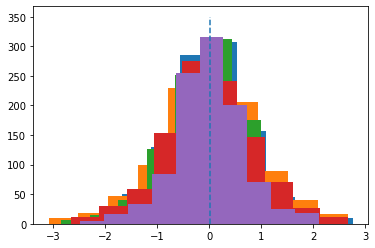

In [13]:
for idx, row in df.iterrows():
    plt.hist(row['Predicted'])
plt.vlines(np.mean(np.array(row['Actual'])),ymin=0,ymax=350,linestyle='--')

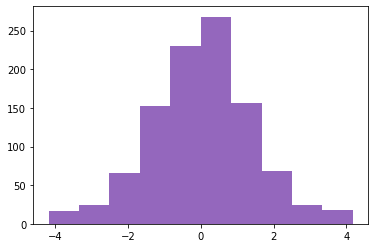

In [36]:
for idx, row in df.iterrows():
    plt.hist(row['Actual'])

0:x and y must have length at least 2.


<ipython-input-24-46ed945eaf12>:26: RuntimeWarning: Mean of empty slice.
  rmse_abs = np.sqrt(((np.array(pred_abs)-np.array(actual_abs)) ** 2).mean())
<ipython-input-24-46ed945eaf12>:30: RuntimeWarning: Mean of empty slice.
  np.abs(np.array(pred_abs)-np.array(actual_abs)).mean())


(array([ 17.,  24.,  66., 153., 230., 268., 156.,  68.,  24.,  18.]),
 array([-4.17609978, -3.34087982, -2.50565987, -1.67043991, -0.83521996,
         0.        ,  0.83521996,  1.67043991,  2.50565987,  3.34087982,
         4.17609978]),
 <BarContainer object of 10 artists>)

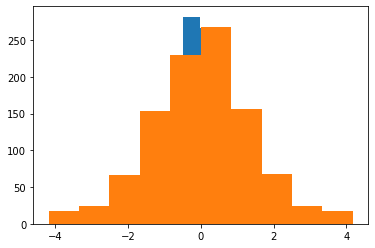

In [43]:
avg_pred = np.array(df['Predicted'].tolist()).mean(axis=0)
r,sr,taur,rmse,mae = get_stats(0,avg_pred,df['Actual'][0],[],[])
plt.hist(avg_pred)
plt.hist(df['Actual'][0])

In [44]:
print(r,rmse,mae)

(0.7009918645757831, nan) (1.0353697153525414, nan) (0.7269794335149526, nan)


In [46]:
np.mean(df['Actual'][0])

0.012948534902534448

# Evaluate Cycle Consistency

In [15]:
model="def2018_triplet"
runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
        filters={"$and":[{"config.use_model":model},
            {'tags':"addnl_ligs_2"},{"config.rot_warmup":0},
            {"config.weight_decay":0},{"config.solver":"adam"},
            {"$not":[{"tags":"jl_comp"}]},{"config.cycle_loss_weight":0}]})

In [101]:
from datetime import date
def get_triplet_stats(model='def2018_triplet',cycle_loss_weight=0,ltdate=None,step='final',trainfiles=None):
    runs = None
    if trainfiles:
        runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
                filters={"$and":[{"config.use_model":model},
                    {'tags':"addnl_ligs_2"},{"config.rot_warmup":0},
                    {"config.weight_decay":0},{"config.solver":"adam"},
                    {"$not":[{"tags":"jl_comp"}]},{"config.cycle_loss_weight":cycle_loss_weight},
                    {"config.trainfile":{"$in":trainfiles}}]})
    else:
        runs = pub_api.runs(path='andmcnutt/DDG_model_Regression',
                filters={"$and":[{"config.use_model":model},
                    {'tags':"addnl_ligs_2"},{"config.rot_warmup":0},
                    {"config.weight_decay":0},{"config.solver":"adam"},
                    {"$not":[{"tags":"jl_comp"}]},{"config.cycle_loss_weight":cycle_loss_weight}]})
    list_finalstep = []
    good_runs = 0
    for run in runs:
        if ltdate is not None and date.fromisoformat(run.createdAt.split('T')[0]) > ltdate:
            continue
        hist_df = run.history(keys=['Test R','Test RMSE','Test MAE','Test R AbsAff','Test RMSE AbsAff','Test MAE AbsAff'])
        if type(step) is int:
            list_finalstep.append(hist_df[hist_df['_step'] == step].squeeze().tolist())
        elif step == 'final':
            list_finalstep.append(hist_df.iloc[-1].tolist())
        else:
            raise NotImplementedError("not sure what you doin")
        good_runs += 1
    final_step = pd.DataFrame(list_finalstep,columns=['step','Test R','Test RMSE','Test MAE','Test R AbsAff','Test RMSE AbsAff','Test MAE AbsAff'])
    print(f"found {good_runs} runs")
    return final_step.mean(),final_step.var()

In [102]:
length_base = pd.read_csv('new_Prot_Lig_Valid/all_train_triplet_rand0_p_2.types').shape[0]
length_t1 = pd.read_csv('new_Prot_Lig_Valid/all_train_triplet_rand0_p_addnl2_2.types').shape[0]

In [103]:
print(length_base, length_t1)

5411 105941


In [109]:
nocyc_base = get_triplet_stats(ltdate=date(2022,2,12),step='final')
t1_step = int(np.ceil(nocyc_base[0].step * length_base / length_t1))
print(t1_step)
nocyc_t1 = get_triplet_stats(trainfiles=[f"new_Prot_Lig_Valid/all_train_triplet_rand{val}_p_addnl2_2.types" for val in range(5)],step=t1_step)
cycle_t1 = get_triplet_stats(cycle_loss_weight=0.05,trainfiles=[f"new_Prot_Lig_Valid/all_train_triplet_rand{val}_p_addnl2_2.types" for val in range(5)],step=t1_step)

found 5 runs
51
519.0
_step               51.000000
Test R               0.665705
Test RMSE            0.922221
Test MAE             0.662646
Test R AbsAff        0.906428
Test RMSE AbsAff     0.689443
Test MAE AbsAff      0.422531
Name: 49, dtype: float64
867.0
_step               51.000000
Test R               0.699087
Test RMSE            0.890786
Test MAE             0.628345
Test R AbsAff        0.914173
Test RMSE AbsAff     0.664115
Test MAE AbsAff      0.404722
Name: 31, dtype: float64
866.0
_step               51.000000
Test R               0.677188
Test RMSE            0.924106
Test MAE             0.663832
Test R AbsAff        0.908100
Test RMSE AbsAff     0.695372
Test MAE AbsAff      0.427016
Name: 31, dtype: float64
525.0
_step               51.000000
Test R               0.668630
Test RMSE            0.930765
Test MAE             0.663495
Test R AbsAff        0.905085
Test RMSE AbsAff     0.691562
Test MAE AbsAff      0.422137
Name: 49, dtype: float64
530.0
_step         

<ipython-input-117-957b7f4ee622>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,rotation=45)


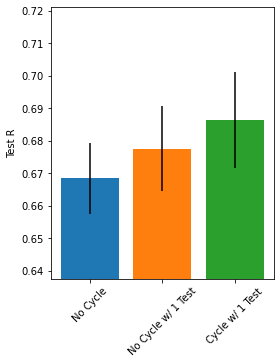

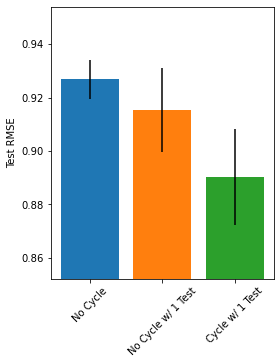

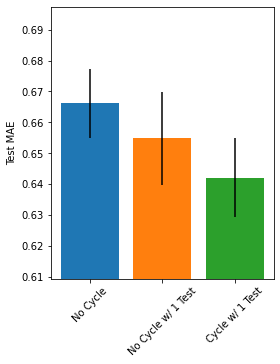

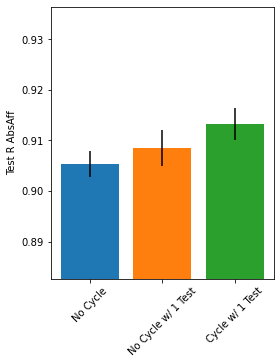

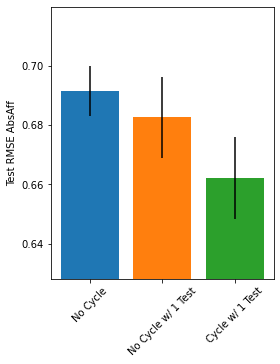

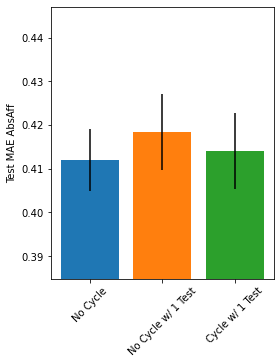

In [117]:
for col in nocyc_base[0].index:
    if col == 'step':
        continue
    plt.figure(figsize=(4,5))
    plt.bar("No Cycle",nocyc_base[0][col],yerr=np.sqrt(nocyc_base[1][col]))
    plt.bar("No Cycle w/ 1 Test",nocyc_t1[0][col],yerr=np.sqrt(nocyc_t1[1][col]))
    plt.bar("Cycle w/ 1 Test",cycle_t1[0][col],yerr=np.sqrt(cycle_t1[1][col]))
    labels = ["No Cycle","No Cycle w/ 1 Test", "Cycle w/ 1 Test"]
    plt.ylabel(col)
    ax = plt.gca()
    ax.set_ylim(min([nocyc_base[0][col]-np.sqrt(nocyc_base[1][col]),nocyc_t1[0][col]-np.sqrt(nocyc_t1[1][col]),cycle_t1[0][col]-np.sqrt(cycle_t1[1][col])])-0.02,
            max([nocyc_base[0][col]+np.sqrt(nocyc_base[1][col]),nocyc_t1[0][col]+np.sqrt(nocyc_t1[1][col]),cycle_t1[0][col]+np.sqrt(cycle_t1[1][col])])+0.02)
    ax.set_xticklabels(labels,rotation=45)